# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

2021-11-08 10:45:01.317961: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-08 10:45:01.318004: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train.csv")
rawvalid = pd.read_csv("Validation.csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [3]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [18]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [19]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               768       
                                                                 
 dense_9 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 1s 14ms/step - loss: 1.0545 - accuracy: 0.6187 - val_loss: 1.0284 - val_accuracy: 0.6199
Epoch 2/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.9776 - accuracy: 0.6619 - val_loss: 0.9722 - val_accuracy: 0.6052
Epoch 3/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.9076 - accuracy: 0.6637 - val_loss: 0.9228 - val_accuracy: 0.6052
Epoch 4/1000
18/18 [

18/18 [==============================] - 0s 4ms/step - loss: 0.4789 - accuracy: 0.8040 - val_loss: 0.5971 - val_accuracy: 0.7454
Epoch 54/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4784 - accuracy: 0.8094 - val_loss: 0.5916 - val_accuracy: 0.7491
Epoch 55/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4792 - accuracy: 0.8040 - val_loss: 0.5901 - val_accuracy: 0.7417
Epoch 56/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4782 - accuracy: 0.8058 - val_loss: 0.5966 - val_accuracy: 0.7454
Epoch 57/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4785 - accuracy: 0.8058 - val_loss: 0.5965 - val_accuracy: 0.7454
Epoch 58/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4776 - accuracy: 0.8058 - val_loss: 0.5918 - val_accuracy: 0.7454
Epoch 59/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4787 - accuracy: 0.8147 - val_loss: 0.5934 - val_accuracy: 0.7417
Epoch 60/1000

18/18 [==============================] - 0s 7ms/step - loss: 0.4717 - accuracy: 0.8058 - val_loss: 0.5991 - val_accuracy: 0.7417
Epoch 111/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4702 - accuracy: 0.8129 - val_loss: 0.5931 - val_accuracy: 0.7454
Epoch 112/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4692 - accuracy: 0.8165 - val_loss: 0.5932 - val_accuracy: 0.7417
Epoch 113/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4709 - accuracy: 0.8147 - val_loss: 0.6007 - val_accuracy: 0.7417
Epoch 114/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4710 - accuracy: 0.8094 - val_loss: 0.5874 - val_accuracy: 0.7454
Epoch 115/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4678 - accuracy: 0.8040 - val_loss: 0.6022 - val_accuracy: 0.7417
Epoch 116/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4686 - accuracy: 0.8147 - val_loss: 0.5982 - val_accuracy: 0.7417
Epoc

Epoch 167/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4633 - accuracy: 0.8165 - val_loss: 0.5970 - val_accuracy: 0.7417
Epoch 168/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4631 - accuracy: 0.8094 - val_loss: 0.5975 - val_accuracy: 0.7417
Epoch 169/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4629 - accuracy: 0.8147 - val_loss: 0.5941 - val_accuracy: 0.7417
Epoch 170/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4629 - accuracy: 0.8129 - val_loss: 0.5981 - val_accuracy: 0.7417
Epoch 171/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4626 - accuracy: 0.8183 - val_loss: 0.5962 - val_accuracy: 0.7417
Epoch 172/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8094 - val_loss: 0.5940 - val_accuracy: 0.7417
Epoch 173/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4623 - accuracy: 0.8112 - val_loss: 0.6037 - val_accuracy:

Epoch 224/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4585 - accuracy: 0.8183 - val_loss: 0.5978 - val_accuracy: 0.7417
Epoch 225/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4594 - accuracy: 0.8094 - val_loss: 0.6035 - val_accuracy: 0.7417
Epoch 226/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4581 - accuracy: 0.8201 - val_loss: 0.5953 - val_accuracy: 0.7417
Epoch 227/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4592 - accuracy: 0.8237 - val_loss: 0.5942 - val_accuracy: 0.7417
Epoch 228/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4583 - accuracy: 0.8165 - val_loss: 0.6011 - val_accuracy: 0.7417
Epoch 229/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4578 - accuracy: 0.8129 - val_loss: 0.5985 - val_accuracy: 0.7417
Epoch 230/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4594 - accuracy: 0.8219 - val_loss: 0.6010 - val_accura

Epoch 281/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4591 - accuracy: 0.8237 - val_loss: 0.5964 - val_accuracy: 0.7417
Epoch 282/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4540 - accuracy: 0.8201 - val_loss: 0.6012 - val_accuracy: 0.7454
Epoch 283/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4583 - accuracy: 0.8183 - val_loss: 0.6048 - val_accuracy: 0.7380
Epoch 284/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4564 - accuracy: 0.8147 - val_loss: 0.6078 - val_accuracy: 0.7454
Epoch 285/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4546 - accuracy: 0.8165 - val_loss: 0.5928 - val_accuracy: 0.7454
Epoch 286/1000
18/18 [==============================] - 0s 15ms/step - loss: 0.4552 - accuracy: 0.8165 - val_loss: 0.5977 - val_accuracy: 0.7454
Epoch 287/1000
18/18 [==============================] - 0s 17ms/step - loss: 0.4564 - accuracy: 0.8183 - val_loss: 0.6054 - val_accurac

Epoch 338/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4529 - accuracy: 0.8147 - val_loss: 0.6029 - val_accuracy: 0.7454
Epoch 339/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4528 - accuracy: 0.8165 - val_loss: 0.6057 - val_accuracy: 0.7417
Epoch 340/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4529 - accuracy: 0.8201 - val_loss: 0.5974 - val_accuracy: 0.7454
Epoch 341/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4522 - accuracy: 0.8183 - val_loss: 0.6018 - val_accuracy: 0.7454
Epoch 342/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.4526 - accuracy: 0.8183 - val_loss: 0.6027 - val_accuracy: 0.7454
Epoch 343/1000
18/18 [==============================] - 0s 17ms/step - loss: 0.4531 - accuracy: 0.8147 - val_loss: 0.5991 - val_accuracy: 0.7454
Epoch 344/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4525 - accuracy: 0.8112 - val_loss: 0.6004 - val_accur

Epoch 395/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4513 - accuracy: 0.8183 - val_loss: 0.6002 - val_accuracy: 0.7454
Epoch 396/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4507 - accuracy: 0.8201 - val_loss: 0.6069 - val_accuracy: 0.7417
Epoch 397/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4534 - accuracy: 0.8165 - val_loss: 0.6038 - val_accuracy: 0.7454
Epoch 398/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4494 - accuracy: 0.8219 - val_loss: 0.6049 - val_accuracy: 0.7417
Epoch 399/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4514 - accuracy: 0.8183 - val_loss: 0.6064 - val_accuracy: 0.7417
Epoch 400/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4525 - accuracy: 0.8201 - val_loss: 0.6007 - val_accuracy: 0.7491
Epoch 401/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4525 - accuracy: 0.8165 - val_loss: 0.6132 - val_accuracy:

Epoch 452/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4492 - accuracy: 0.8237 - val_loss: 0.6093 - val_accuracy: 0.7454
Epoch 453/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4492 - accuracy: 0.8165 - val_loss: 0.6069 - val_accuracy: 0.7380
Epoch 454/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4496 - accuracy: 0.8183 - val_loss: 0.6036 - val_accuracy: 0.7491
Epoch 455/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4487 - accuracy: 0.8183 - val_loss: 0.6046 - val_accuracy: 0.7454
Epoch 456/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4491 - accuracy: 0.8201 - val_loss: 0.6056 - val_accuracy: 0.7454
Epoch 457/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4505 - accuracy: 0.8201 - val_loss: 0.6105 - val_accuracy: 0.7454
Epoch 458/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4487 - accuracy: 0.8165 - val_loss: 0.6022 - val_accura

Epoch 509/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4489 - accuracy: 0.8165 - val_loss: 0.6087 - val_accuracy: 0.7454
Epoch 510/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4493 - accuracy: 0.8201 - val_loss: 0.6100 - val_accuracy: 0.7454
Epoch 511/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4478 - accuracy: 0.8219 - val_loss: 0.6062 - val_accuracy: 0.7491
Epoch 512/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4488 - accuracy: 0.8219 - val_loss: 0.6057 - val_accuracy: 0.7491
Epoch 513/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4484 - accuracy: 0.8219 - val_loss: 0.6057 - val_accuracy: 0.7454
Epoch 514/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4470 - accuracy: 0.8237 - val_loss: 0.6112 - val_accuracy: 0.7454
Epoch 515/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4481 - accuracy: 0.8201 - val_loss: 0.6021 - val_accurac

Epoch 566/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4493 - accuracy: 0.8165 - val_loss: 0.6043 - val_accuracy: 0.7491
Epoch 567/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4470 - accuracy: 0.8183 - val_loss: 0.6069 - val_accuracy: 0.7491
Epoch 568/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4462 - accuracy: 0.8237 - val_loss: 0.6092 - val_accuracy: 0.7491
Epoch 569/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4487 - accuracy: 0.8183 - val_loss: 0.6084 - val_accuracy: 0.7417
Epoch 570/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4471 - accuracy: 0.8147 - val_loss: 0.6179 - val_accuracy: 0.7380
Epoch 571/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4501 - accuracy: 0.8201 - val_loss: 0.6068 - val_accuracy: 0.7454
Epoch 572/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4480 - accuracy: 0.8201 - val_loss: 0.6149 - val_accur

Epoch 623/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4454 - accuracy: 0.8219 - val_loss: 0.6152 - val_accuracy: 0.7454
Epoch 624/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4473 - accuracy: 0.8165 - val_loss: 0.6124 - val_accuracy: 0.7454
Epoch 625/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4484 - accuracy: 0.8219 - val_loss: 0.6144 - val_accuracy: 0.7454
Epoch 626/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4481 - accuracy: 0.8201 - val_loss: 0.6027 - val_accuracy: 0.7454
Epoch 627/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4485 - accuracy: 0.8112 - val_loss: 0.6160 - val_accuracy: 0.7343
Epoch 628/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4470 - accuracy: 0.8183 - val_loss: 0.6006 - val_accuracy: 0.7454
Epoch 629/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4460 - accuracy: 0.8219 - val_loss: 0.6127 - val_accuracy

Epoch 680/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4458 - accuracy: 0.8273 - val_loss: 0.6025 - val_accuracy: 0.7454
Epoch 681/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4450 - accuracy: 0.8219 - val_loss: 0.6100 - val_accuracy: 0.7491
Epoch 682/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4447 - accuracy: 0.8255 - val_loss: 0.6133 - val_accuracy: 0.7454
Epoch 683/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4446 - accuracy: 0.8183 - val_loss: 0.6087 - val_accuracy: 0.7454
Epoch 684/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4460 - accuracy: 0.8219 - val_loss: 0.6120 - val_accuracy: 0.7454
Epoch 685/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4450 - accuracy: 0.8201 - val_loss: 0.6111 - val_accuracy: 0.7491
Epoch 686/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4437 - accuracy: 0.8255 - val_loss: 0.6088 - val_accuracy

Epoch 737/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4437 - accuracy: 0.8255 - val_loss: 0.6120 - val_accuracy: 0.7491
Epoch 738/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4440 - accuracy: 0.8237 - val_loss: 0.6134 - val_accuracy: 0.7454
Epoch 739/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4432 - accuracy: 0.8237 - val_loss: 0.6078 - val_accuracy: 0.7491
Epoch 740/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4437 - accuracy: 0.8219 - val_loss: 0.6115 - val_accuracy: 0.7491
Epoch 741/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4443 - accuracy: 0.8201 - val_loss: 0.6148 - val_accuracy: 0.7454
Epoch 742/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.4434 - accuracy: 0.8201 - val_loss: 0.6147 - val_accuracy: 0.7491
Epoch 743/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4445 - accuracy: 0.8219 - val_loss: 0.6062 - val_accuracy

Epoch 794/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4437 - accuracy: 0.8237 - val_loss: 0.6146 - val_accuracy: 0.7491
Epoch 795/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4457 - accuracy: 0.8165 - val_loss: 0.6177 - val_accuracy: 0.7454
Epoch 796/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4482 - accuracy: 0.8147 - val_loss: 0.6055 - val_accuracy: 0.7491
Epoch 797/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4429 - accuracy: 0.8219 - val_loss: 0.6163 - val_accuracy: 0.7454
Epoch 798/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4431 - accuracy: 0.8112 - val_loss: 0.6108 - val_accuracy: 0.7491
Epoch 799/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4423 - accuracy: 0.8219 - val_loss: 0.6111 - val_accuracy: 0.7454
Epoch 800/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4428 - accuracy: 0.8201 - val_loss: 0.6112 - val_accuracy:

Epoch 851/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4425 - accuracy: 0.8219 - val_loss: 0.6157 - val_accuracy: 0.7491
Epoch 852/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4419 - accuracy: 0.8219 - val_loss: 0.6085 - val_accuracy: 0.7491
Epoch 853/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4423 - accuracy: 0.8219 - val_loss: 0.6134 - val_accuracy: 0.7491
Epoch 854/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4427 - accuracy: 0.8201 - val_loss: 0.6179 - val_accuracy: 0.7454
Epoch 855/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4428 - accuracy: 0.8219 - val_loss: 0.6106 - val_accuracy: 0.7454
Epoch 856/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4427 - accuracy: 0.8273 - val_loss: 0.6184 - val_accuracy: 0.7528
Epoch 857/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4411 - accuracy: 0.8237 - val_loss: 0.6172 - val_accurac

Epoch 908/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4406 - accuracy: 0.8201 - val_loss: 0.6160 - val_accuracy: 0.7491
Epoch 909/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4420 - accuracy: 0.8237 - val_loss: 0.6087 - val_accuracy: 0.7491
Epoch 910/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4412 - accuracy: 0.8237 - val_loss: 0.6184 - val_accuracy: 0.7491
Epoch 911/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4401 - accuracy: 0.8201 - val_loss: 0.6115 - val_accuracy: 0.7454
Epoch 912/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4415 - accuracy: 0.8255 - val_loss: 0.6148 - val_accuracy: 0.7491
Epoch 913/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4413 - accuracy: 0.8237 - val_loss: 0.6162 - val_accuracy: 0.7491
Epoch 914/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4443 - accuracy: 0.8219 - val_loss: 0.6193 - val_accurac

18/18 [==============================] - 0s 6ms/step - loss: 0.4407 - accuracy: 0.8219 - val_loss: 0.6161 - val_accuracy: 0.7528
Epoch 965/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4397 - accuracy: 0.8219 - val_loss: 0.6150 - val_accuracy: 0.7491
Epoch 966/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4412 - accuracy: 0.8237 - val_loss: 0.6096 - val_accuracy: 0.7491
Epoch 967/1000
18/18 [==============================] - 0s 16ms/step - loss: 0.4409 - accuracy: 0.8291 - val_loss: 0.6161 - val_accuracy: 0.7454
Epoch 968/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.4405 - accuracy: 0.8237 - val_loss: 0.6226 - val_accuracy: 0.7454
Epoch 969/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4426 - accuracy: 0.8201 - val_loss: 0.6097 - val_accuracy: 0.7491
Epoch 970/1000
18/18 [==============================] - 0s 19ms/step - loss: 0.4399 - accuracy: 0.8273 - val_loss: 0.6156 - val_accuracy: 0.7491
Epo

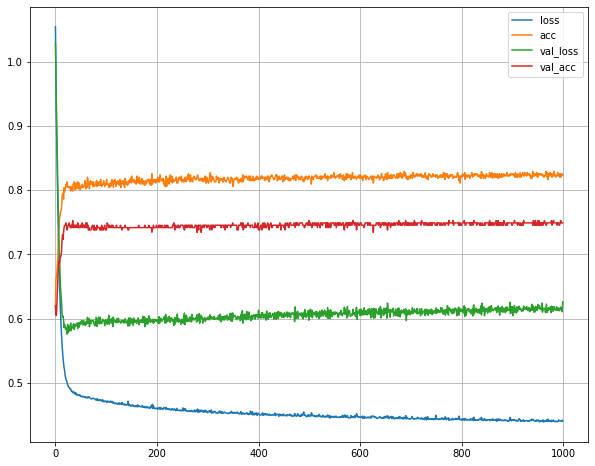

In [20]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

With an increasing validation loss after roughly 30-50 epochs, we seem to run into overfitting towards our training data set.

In [7]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6165786385536194
Validation accuracy: 0.7453874349594116


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

### F1 F2 F3 F4

In [15]:
# Features to use
features = ["F1","F2","F3","F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               1280      
                                                                 
 dense_7 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 1s 17ms/step - loss: 1.0722 - accuracy: 0.5270 - val_loss: 1.0462 - val_accuracy: 0.5424
Epoch 2/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.9962 - accuracy: 0.6205 - val_loss: 1.0031 - val_accuracy: 0.5277
Epoch 3/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.9379 - accuracy: 0.6313 - val_loss: 0.9651 - val_accuracy: 0.5720
Epoch 4/1000
18/18 [=

18/18 [==============================] - 0s 6ms/step - loss: 0.4478 - accuracy: 0.8255 - val_loss: 0.5762 - val_accuracy: 0.7491
Epoch 54/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4480 - accuracy: 0.8255 - val_loss: 0.5791 - val_accuracy: 0.7491
Epoch 55/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4474 - accuracy: 0.8255 - val_loss: 0.5770 - val_accuracy: 0.7491
Epoch 56/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4479 - accuracy: 0.8291 - val_loss: 0.5804 - val_accuracy: 0.7528
Epoch 57/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4463 - accuracy: 0.8255 - val_loss: 0.5734 - val_accuracy: 0.7528
Epoch 58/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4460 - accuracy: 0.8255 - val_loss: 0.5770 - val_accuracy: 0.7491
Epoch 59/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4455 - accuracy: 0.8273 - val_loss: 0.5857 - val_accuracy: 0.7454
Epoch 60/1000

18/18 [==============================] - 0s 10ms/step - loss: 0.4240 - accuracy: 0.8381 - val_loss: 0.5771 - val_accuracy: 0.7491
Epoch 111/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4257 - accuracy: 0.8345 - val_loss: 0.5817 - val_accuracy: 0.7491
Epoch 112/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4292 - accuracy: 0.8399 - val_loss: 0.5870 - val_accuracy: 0.7380
Epoch 113/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4231 - accuracy: 0.8345 - val_loss: 0.5758 - val_accuracy: 0.7491
Epoch 114/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4250 - accuracy: 0.8345 - val_loss: 0.5862 - val_accuracy: 0.7343
Epoch 115/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4240 - accuracy: 0.8435 - val_loss: 0.5759 - val_accuracy: 0.7528
Epoch 116/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4234 - accuracy: 0.8381 - val_loss: 0.5771 - val_accuracy: 0.7491
Epoch

Epoch 167/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4050 - accuracy: 0.8507 - val_loss: 0.5859 - val_accuracy: 0.7454
Epoch 168/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4052 - accuracy: 0.8489 - val_loss: 0.5767 - val_accuracy: 0.7417
Epoch 169/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4059 - accuracy: 0.8507 - val_loss: 0.5844 - val_accuracy: 0.7491
Epoch 170/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4035 - accuracy: 0.8489 - val_loss: 0.5750 - val_accuracy: 0.7417
Epoch 171/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4046 - accuracy: 0.8435 - val_loss: 0.5854 - val_accuracy: 0.7454
Epoch 172/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4052 - accuracy: 0.8453 - val_loss: 0.5754 - val_accuracy: 0.7491
Epoch 173/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4033 - accuracy: 0.8471 - val_loss: 0.5775 - val_accuracy:

Epoch 224/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3897 - accuracy: 0.8471 - val_loss: 0.5804 - val_accuracy: 0.7491
Epoch 225/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3906 - accuracy: 0.8525 - val_loss: 0.5839 - val_accuracy: 0.7454
Epoch 226/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.3911 - accuracy: 0.8543 - val_loss: 0.5874 - val_accuracy: 0.7491
Epoch 227/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3917 - accuracy: 0.8543 - val_loss: 0.5837 - val_accuracy: 0.7491
Epoch 228/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3903 - accuracy: 0.8525 - val_loss: 0.5946 - val_accuracy: 0.7491
Epoch 229/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3882 - accuracy: 0.8507 - val_loss: 0.5892 - val_accuracy: 0.7417
Epoch 230/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3871 - accuracy: 0.8543 - val_loss: 0.5902 - val_accuracy

Epoch 281/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3771 - accuracy: 0.8525 - val_loss: 0.5971 - val_accuracy: 0.7454
Epoch 282/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3766 - accuracy: 0.8561 - val_loss: 0.6028 - val_accuracy: 0.7528
Epoch 283/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.3762 - accuracy: 0.8507 - val_loss: 0.6000 - val_accuracy: 0.7565
Epoch 284/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3771 - accuracy: 0.8561 - val_loss: 0.5901 - val_accuracy: 0.7454
Epoch 285/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3757 - accuracy: 0.8543 - val_loss: 0.5999 - val_accuracy: 0.7565
Epoch 286/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3751 - accuracy: 0.8489 - val_loss: 0.6026 - val_accuracy: 0.7380
Epoch 287/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3741 - accuracy: 0.8507 - val_loss: 0.5957 - val_accurac

Epoch 338/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3642 - accuracy: 0.8543 - val_loss: 0.6144 - val_accuracy: 0.7454
Epoch 339/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3660 - accuracy: 0.8525 - val_loss: 0.6180 - val_accuracy: 0.7565
Epoch 340/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3655 - accuracy: 0.8561 - val_loss: 0.6137 - val_accuracy: 0.7601
Epoch 341/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3654 - accuracy: 0.8525 - val_loss: 0.6077 - val_accuracy: 0.7565
Epoch 342/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.3649 - accuracy: 0.8525 - val_loss: 0.6135 - val_accuracy: 0.7601
Epoch 343/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3641 - accuracy: 0.8543 - val_loss: 0.6144 - val_accuracy: 0.7565
Epoch 344/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3643 - accuracy: 0.8525 - val_loss: 0.6147 - val_accurac

18/18 [==============================] - 0s 14ms/step - loss: 0.3598 - accuracy: 0.8579 - val_loss: 0.6293 - val_accuracy: 0.7528
Epoch 395/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.3569 - accuracy: 0.8597 - val_loss: 0.6171 - val_accuracy: 0.7565
Epoch 396/1000
18/18 [==============================] - 0s 19ms/step - loss: 0.3553 - accuracy: 0.8525 - val_loss: 0.6362 - val_accuracy: 0.7565
Epoch 397/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3572 - accuracy: 0.8579 - val_loss: 0.6298 - val_accuracy: 0.7528
Epoch 398/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3548 - accuracy: 0.8507 - val_loss: 0.6214 - val_accuracy: 0.7638
Epoch 399/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3550 - accuracy: 0.8525 - val_loss: 0.6205 - val_accuracy: 0.7528
Epoch 400/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3531 - accuracy: 0.8579 - val_loss: 0.6292 - val_accuracy: 0.7565
Epoc

18/18 [==============================] - 0s 5ms/step - loss: 0.3478 - accuracy: 0.8561 - val_loss: 0.6340 - val_accuracy: 0.7528
Epoch 451/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3472 - accuracy: 0.8615 - val_loss: 0.6457 - val_accuracy: 0.7491
Epoch 452/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.8615 - val_loss: 0.6450 - val_accuracy: 0.7565
Epoch 453/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.8615 - val_loss: 0.6361 - val_accuracy: 0.7565
Epoch 454/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3481 - accuracy: 0.8471 - val_loss: 0.6431 - val_accuracy: 0.7565
Epoch 455/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3490 - accuracy: 0.8615 - val_loss: 0.6433 - val_accuracy: 0.7528
Epoch 456/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8633 - val_loss: 0.6347 - val_accuracy: 0.7565
Epoch 4

Epoch 507/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3379 - accuracy: 0.8597 - val_loss: 0.6588 - val_accuracy: 0.7638
Epoch 508/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3380 - accuracy: 0.8687 - val_loss: 0.6562 - val_accuracy: 0.7528
Epoch 509/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3380 - accuracy: 0.8651 - val_loss: 0.6566 - val_accuracy: 0.7565
Epoch 510/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3387 - accuracy: 0.8543 - val_loss: 0.6575 - val_accuracy: 0.7638
Epoch 511/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3397 - accuracy: 0.8615 - val_loss: 0.6542 - val_accuracy: 0.7565
Epoch 512/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3387 - accuracy: 0.8615 - val_loss: 0.6548 - val_accuracy: 0.7601
Epoch 513/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3385 - accuracy: 0.8561 - val_loss: 0.6594 - val_accuracy:

Epoch 564/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3313 - accuracy: 0.8651 - val_loss: 0.6850 - val_accuracy: 0.7565
Epoch 565/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.8633 - val_loss: 0.6732 - val_accuracy: 0.7601
Epoch 566/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3307 - accuracy: 0.8633 - val_loss: 0.6733 - val_accuracy: 0.7601
Epoch 567/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3326 - accuracy: 0.8543 - val_loss: 0.6805 - val_accuracy: 0.7565
Epoch 568/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3305 - accuracy: 0.8651 - val_loss: 0.6713 - val_accuracy: 0.7601
Epoch 569/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3347 - accuracy: 0.8651 - val_loss: 0.6682 - val_accuracy: 0.7528
Epoch 570/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3309 - accuracy: 0.8579 - val_loss: 0.6883 - val_accuracy:

Epoch 621/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3240 - accuracy: 0.8615 - val_loss: 0.6968 - val_accuracy: 0.7565
Epoch 622/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3256 - accuracy: 0.8615 - val_loss: 0.6903 - val_accuracy: 0.7601
Epoch 623/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3274 - accuracy: 0.8615 - val_loss: 0.7015 - val_accuracy: 0.7565
Epoch 624/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3243 - accuracy: 0.8651 - val_loss: 0.6880 - val_accuracy: 0.7638
Epoch 625/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3300 - accuracy: 0.8615 - val_loss: 0.6972 - val_accuracy: 0.7528
Epoch 626/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3239 - accuracy: 0.8615 - val_loss: 0.6887 - val_accuracy: 0.7601
Epoch 627/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3275 - accuracy: 0.8543 - val_loss: 0.6973 - val_accuracy:

Epoch 678/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3200 - accuracy: 0.8669 - val_loss: 0.7135 - val_accuracy: 0.7528
Epoch 679/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.3181 - accuracy: 0.8687 - val_loss: 0.7125 - val_accuracy: 0.7565
Epoch 680/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3202 - accuracy: 0.8633 - val_loss: 0.7061 - val_accuracy: 0.7601
Epoch 681/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3189 - accuracy: 0.8525 - val_loss: 0.7094 - val_accuracy: 0.7601
Epoch 682/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3172 - accuracy: 0.8633 - val_loss: 0.7079 - val_accuracy: 0.7601
Epoch 683/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3176 - accuracy: 0.8651 - val_loss: 0.7177 - val_accuracy: 0.7528
Epoch 684/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8687 - val_loss: 0.7100 - val_accuracy

Epoch 735/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3146 - accuracy: 0.8669 - val_loss: 0.7353 - val_accuracy: 0.7601
Epoch 736/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3136 - accuracy: 0.8651 - val_loss: 0.7375 - val_accuracy: 0.7565
Epoch 737/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3150 - accuracy: 0.8669 - val_loss: 0.7417 - val_accuracy: 0.7528
Epoch 738/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3122 - accuracy: 0.8687 - val_loss: 0.7329 - val_accuracy: 0.7565
Epoch 739/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3139 - accuracy: 0.8669 - val_loss: 0.7450 - val_accuracy: 0.7565
Epoch 740/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8669 - val_loss: 0.7390 - val_accuracy: 0.7638
Epoch 741/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3125 - accuracy: 0.8651 - val_loss: 0.7411 - val_accuracy:

Epoch 792/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3086 - accuracy: 0.8669 - val_loss: 0.7492 - val_accuracy: 0.7601
Epoch 793/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3092 - accuracy: 0.8723 - val_loss: 0.7597 - val_accuracy: 0.7601
Epoch 794/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3091 - accuracy: 0.8723 - val_loss: 0.7525 - val_accuracy: 0.7565
Epoch 795/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 0.8705 - val_loss: 0.7520 - val_accuracy: 0.7601
Epoch 796/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8723 - val_loss: 0.7638 - val_accuracy: 0.7491
Epoch 797/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3091 - accuracy: 0.8741 - val_loss: 0.7474 - val_accuracy: 0.7565
Epoch 798/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.3107 - accuracy: 0.8687 - val_loss: 0.7540 - val_accuracy:

Epoch 849/1000
18/18 [==============================] - 0s 14ms/step - loss: 0.3049 - accuracy: 0.8723 - val_loss: 0.7826 - val_accuracy: 0.7528
Epoch 850/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3046 - accuracy: 0.8777 - val_loss: 0.7800 - val_accuracy: 0.7565
Epoch 851/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3066 - accuracy: 0.8741 - val_loss: 0.7918 - val_accuracy: 0.7454
Epoch 852/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3036 - accuracy: 0.8777 - val_loss: 0.7762 - val_accuracy: 0.7565
Epoch 853/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3049 - accuracy: 0.8723 - val_loss: 0.7840 - val_accuracy: 0.7528
Epoch 854/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3044 - accuracy: 0.8705 - val_loss: 0.7839 - val_accuracy: 0.7528
Epoch 855/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3029 - accuracy: 0.8795 - val_loss: 0.7781 - val_accurac

Epoch 906/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2994 - accuracy: 0.8831 - val_loss: 0.7940 - val_accuracy: 0.7491
Epoch 907/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2979 - accuracy: 0.8759 - val_loss: 0.8046 - val_accuracy: 0.7491
Epoch 908/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.2992 - accuracy: 0.8759 - val_loss: 0.8045 - val_accuracy: 0.7528
Epoch 909/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2997 - accuracy: 0.8741 - val_loss: 0.7971 - val_accuracy: 0.7454
Epoch 910/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3011 - accuracy: 0.8813 - val_loss: 0.7995 - val_accuracy: 0.7528
Epoch 911/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.2971 - accuracy: 0.8759 - val_loss: 0.7970 - val_accuracy: 0.7491
Epoch 912/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.2979 - accuracy: 0.8741 - val_loss: 0.8060 - val_accuracy

Epoch 963/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2952 - accuracy: 0.8777 - val_loss: 0.8245 - val_accuracy: 0.7528
Epoch 964/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.2956 - accuracy: 0.8759 - val_loss: 0.8197 - val_accuracy: 0.7491
Epoch 965/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.2948 - accuracy: 0.8777 - val_loss: 0.8177 - val_accuracy: 0.7565
Epoch 966/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.2944 - accuracy: 0.8813 - val_loss: 0.8248 - val_accuracy: 0.7491
Epoch 967/1000
18/18 [==============================] - 0s 14ms/step - loss: 0.2945 - accuracy: 0.8723 - val_loss: 0.8131 - val_accuracy: 0.7528
Epoch 968/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2924 - accuracy: 0.8903 - val_loss: 0.8170 - val_accuracy: 0.7528
Epoch 969/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2939 - accuracy: 0.8795 - val_loss: 0.8227 - val_accur

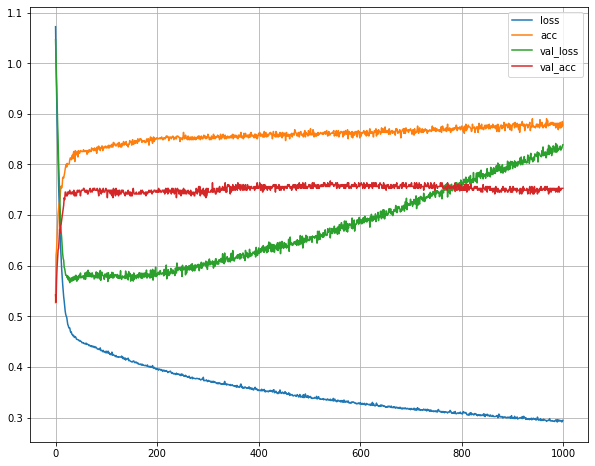

In [16]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

Same as with using less features, we run into overfitting the training data after roughly 30-150 epochs. The main difference is, once we're in the overfitting region, the loss on the validation set grows stronger compared to using less features.

In [17]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.8389132618904114
Validation accuracy: 0.7527675032615662


### F1 F2 F3 F4 B1 B2 B3 B4

In [21]:
# Features to use
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               2304      
                                                                 
 dense_11 (Dense)            (None, 3)                 771       
                                                                 
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 1s 21ms/step - loss: 1.0494 - accuracy: 0.5522 - val_loss: 1.0351 - val_accuracy: 0.4871
Epoch 2/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.9751 - accuracy: 0.5953 - val_loss: 0.9901 - val_accuracy: 0.5240
Epoch 3/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.9148 - accuracy: 0.6385 - val_loss: 0.9464 - val_accuracy: 0.5867
Epoch 4/1000
18/18 [=

18/18 [==============================] - 0s 7ms/step - loss: 0.4313 - accuracy: 0.8381 - val_loss: 0.5926 - val_accuracy: 0.7417
Epoch 54/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4282 - accuracy: 0.8399 - val_loss: 0.5875 - val_accuracy: 0.7528
Epoch 55/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4297 - accuracy: 0.8381 - val_loss: 0.5964 - val_accuracy: 0.7417
Epoch 56/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4281 - accuracy: 0.8417 - val_loss: 0.5957 - val_accuracy: 0.7380
Epoch 57/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4272 - accuracy: 0.8417 - val_loss: 0.5893 - val_accuracy: 0.7380
Epoch 58/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4272 - accuracy: 0.8381 - val_loss: 0.5881 - val_accuracy: 0.7528
Epoch 59/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4253 - accuracy: 0.8417 - val_loss: 0.5932 - val_accuracy: 0.7491
Epoch 60/1000

18/18 [==============================] - 0s 17ms/step - loss: 0.3920 - accuracy: 0.8543 - val_loss: 0.5844 - val_accuracy: 0.7417
Epoch 111/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3909 - accuracy: 0.8525 - val_loss: 0.5949 - val_accuracy: 0.7343
Epoch 112/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3909 - accuracy: 0.8453 - val_loss: 0.5884 - val_accuracy: 0.7491
Epoch 113/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3926 - accuracy: 0.8543 - val_loss: 0.5837 - val_accuracy: 0.7380
Epoch 114/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3875 - accuracy: 0.8525 - val_loss: 0.5861 - val_accuracy: 0.7565
Epoch 115/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3896 - accuracy: 0.8471 - val_loss: 0.5838 - val_accuracy: 0.7491
Epoch 116/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.3901 - accuracy: 0.8453 - val_loss: 0.5881 - val_accuracy: 0.7454
Epoch

Epoch 167/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3613 - accuracy: 0.8579 - val_loss: 0.6025 - val_accuracy: 0.7343
Epoch 168/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3577 - accuracy: 0.8525 - val_loss: 0.5912 - val_accuracy: 0.7528
Epoch 169/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3591 - accuracy: 0.8507 - val_loss: 0.5911 - val_accuracy: 0.7528
Epoch 170/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3587 - accuracy: 0.8561 - val_loss: 0.6031 - val_accuracy: 0.7417
Epoch 171/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3566 - accuracy: 0.8597 - val_loss: 0.5999 - val_accuracy: 0.7528
Epoch 172/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3592 - accuracy: 0.8579 - val_loss: 0.5917 - val_accuracy: 0.7565
Epoch 173/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3588 - accuracy: 0.8489 - val_loss: 0.5997 - val_accurac

Epoch 224/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3344 - accuracy: 0.8615 - val_loss: 0.6079 - val_accuracy: 0.7491
Epoch 225/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3323 - accuracy: 0.8597 - val_loss: 0.6144 - val_accuracy: 0.7491
Epoch 226/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3359 - accuracy: 0.8561 - val_loss: 0.6120 - val_accuracy: 0.7528
Epoch 227/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3309 - accuracy: 0.8615 - val_loss: 0.6270 - val_accuracy: 0.7380
Epoch 228/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3319 - accuracy: 0.8597 - val_loss: 0.6131 - val_accuracy: 0.7491
Epoch 229/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3329 - accuracy: 0.8651 - val_loss: 0.6245 - val_accuracy: 0.7491
Epoch 230/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3327 - accuracy: 0.8597 - val_loss: 0.6104 - val_accuracy:

18/18 [==============================] - 0s 6ms/step - loss: 0.3136 - accuracy: 0.8723 - val_loss: 0.6436 - val_accuracy: 0.7343
Epoch 281/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3116 - accuracy: 0.8705 - val_loss: 0.6386 - val_accuracy: 0.7601
Epoch 282/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3134 - accuracy: 0.8741 - val_loss: 0.6383 - val_accuracy: 0.7565
Epoch 283/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3128 - accuracy: 0.8723 - val_loss: 0.6526 - val_accuracy: 0.7454
Epoch 284/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3132 - accuracy: 0.8741 - val_loss: 0.6404 - val_accuracy: 0.7454
Epoch 285/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3181 - accuracy: 0.8669 - val_loss: 0.6469 - val_accuracy: 0.7565
Epoch 286/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3114 - accuracy: 0.8669 - val_loss: 0.6543 - val_accuracy: 0.7380
Epoch 

Epoch 337/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2962 - accuracy: 0.8849 - val_loss: 0.6655 - val_accuracy: 0.7454
Epoch 338/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.2934 - accuracy: 0.8813 - val_loss: 0.6758 - val_accuracy: 0.7528
Epoch 339/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2929 - accuracy: 0.8831 - val_loss: 0.6683 - val_accuracy: 0.7565
Epoch 340/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2941 - accuracy: 0.8777 - val_loss: 0.6771 - val_accuracy: 0.7491
Epoch 341/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.2928 - accuracy: 0.8813 - val_loss: 0.6699 - val_accuracy: 0.7528
Epoch 342/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.2932 - accuracy: 0.8849 - val_loss: 0.6747 - val_accuracy: 0.7454
Epoch 343/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2908 - accuracy: 0.8867 - val_loss: 0.6747 - val_accuracy

Epoch 394/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.2773 - accuracy: 0.8903 - val_loss: 0.7001 - val_accuracy: 0.7343
Epoch 395/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2794 - accuracy: 0.8813 - val_loss: 0.7091 - val_accuracy: 0.7380
Epoch 396/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2766 - accuracy: 0.8885 - val_loss: 0.7005 - val_accuracy: 0.7343
Epoch 397/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2770 - accuracy: 0.8939 - val_loss: 0.7103 - val_accuracy: 0.7380
Epoch 398/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.2766 - accuracy: 0.8885 - val_loss: 0.7021 - val_accuracy: 0.7417
Epoch 399/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2764 - accuracy: 0.8849 - val_loss: 0.7034 - val_accuracy: 0.7417
Epoch 400/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2738 - accuracy: 0.8939 - val_loss: 0.7052 - val_accuracy

Epoch 451/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.2603 - accuracy: 0.8921 - val_loss: 0.7319 - val_accuracy: 0.7232
Epoch 452/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2590 - accuracy: 0.8957 - val_loss: 0.7448 - val_accuracy: 0.7159
Epoch 453/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2622 - accuracy: 0.8939 - val_loss: 0.7359 - val_accuracy: 0.7196
Epoch 454/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2618 - accuracy: 0.8903 - val_loss: 0.7406 - val_accuracy: 0.7196
Epoch 455/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2602 - accuracy: 0.8957 - val_loss: 0.7364 - val_accuracy: 0.7159
Epoch 456/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.2601 - accuracy: 0.8975 - val_loss: 0.7425 - val_accuracy: 0.7122
Epoch 457/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2616 - accuracy: 0.8921 - val_loss: 0.7443 - val_accurac

Epoch 508/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.2459 - accuracy: 0.9047 - val_loss: 0.7651 - val_accuracy: 0.7159
Epoch 509/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.2481 - accuracy: 0.8975 - val_loss: 0.7744 - val_accuracy: 0.7159
Epoch 510/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2471 - accuracy: 0.9029 - val_loss: 0.7649 - val_accuracy: 0.7122
Epoch 511/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.2468 - accuracy: 0.8975 - val_loss: 0.7761 - val_accuracy: 0.7122
Epoch 512/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.2478 - accuracy: 0.9011 - val_loss: 0.7669 - val_accuracy: 0.7159
Epoch 513/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.2448 - accuracy: 0.8993 - val_loss: 0.7730 - val_accuracy: 0.7159
Epoch 514/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2461 - accuracy: 0.8957 - val_loss: 0.7722 - val_accu

Epoch 565/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2381 - accuracy: 0.9029 - val_loss: 0.7942 - val_accuracy: 0.7122
Epoch 566/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.2389 - accuracy: 0.8975 - val_loss: 0.8157 - val_accuracy: 0.7122
Epoch 567/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2370 - accuracy: 0.9029 - val_loss: 0.7961 - val_accuracy: 0.7196
Epoch 568/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2353 - accuracy: 0.8939 - val_loss: 0.8000 - val_accuracy: 0.7159
Epoch 569/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.2355 - accuracy: 0.9047 - val_loss: 0.8005 - val_accuracy: 0.7085
Epoch 570/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2347 - accuracy: 0.9011 - val_loss: 0.7994 - val_accuracy: 0.7122
Epoch 571/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2328 - accuracy: 0.9065 - val_loss: 0.8060 - val_accurac

Epoch 622/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.2225 - accuracy: 0.9119 - val_loss: 0.8335 - val_accuracy: 0.7048
Epoch 623/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2226 - accuracy: 0.9137 - val_loss: 0.8363 - val_accuracy: 0.7122
Epoch 624/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2227 - accuracy: 0.9065 - val_loss: 0.8234 - val_accuracy: 0.7085
Epoch 625/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2216 - accuracy: 0.9083 - val_loss: 0.8355 - val_accuracy: 0.7122
Epoch 626/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2225 - accuracy: 0.9101 - val_loss: 0.8346 - val_accuracy: 0.7122
Epoch 627/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2215 - accuracy: 0.9083 - val_loss: 0.8427 - val_accuracy: 0.7159
Epoch 628/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2234 - accuracy: 0.9047 - val_loss: 0.8308 - val_accuracy:

Epoch 679/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.2107 - accuracy: 0.9191 - val_loss: 0.8530 - val_accuracy: 0.7196
Epoch 680/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2117 - accuracy: 0.9173 - val_loss: 0.8646 - val_accuracy: 0.7048
Epoch 681/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2137 - accuracy: 0.9047 - val_loss: 0.8591 - val_accuracy: 0.7159
Epoch 682/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.2125 - accuracy: 0.9101 - val_loss: 0.8582 - val_accuracy: 0.7159
Epoch 683/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2111 - accuracy: 0.9155 - val_loss: 0.8629 - val_accuracy: 0.7196
Epoch 684/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2104 - accuracy: 0.9191 - val_loss: 0.8588 - val_accuracy: 0.7159
Epoch 685/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.2136 - accuracy: 0.9173 - val_loss: 0.8699 - val_accuracy:

Epoch 736/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2025 - accuracy: 0.9173 - val_loss: 0.8962 - val_accuracy: 0.7048
Epoch 737/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.2020 - accuracy: 0.9137 - val_loss: 0.8964 - val_accuracy: 0.7159
Epoch 738/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2006 - accuracy: 0.9173 - val_loss: 0.9032 - val_accuracy: 0.7122
Epoch 739/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2015 - accuracy: 0.9191 - val_loss: 0.9038 - val_accuracy: 0.7159
Epoch 740/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.2016 - accuracy: 0.9155 - val_loss: 0.8896 - val_accuracy: 0.7196
Epoch 741/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.2004 - accuracy: 0.9191 - val_loss: 0.9024 - val_accuracy: 0.7122
Epoch 742/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.1989 - accuracy: 0.9191 - val_loss: 0.9005 - val_accuracy

Epoch 793/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.1907 - accuracy: 0.9191 - val_loss: 0.9190 - val_accuracy: 0.7232
Epoch 794/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.1922 - accuracy: 0.9263 - val_loss: 0.9223 - val_accuracy: 0.7122
Epoch 795/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.1905 - accuracy: 0.9263 - val_loss: 0.9294 - val_accuracy: 0.7122
Epoch 796/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.1918 - accuracy: 0.9209 - val_loss: 0.9285 - val_accuracy: 0.7122
Epoch 797/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.1904 - accuracy: 0.9209 - val_loss: 0.9308 - val_accuracy: 0.7159
Epoch 798/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.1918 - accuracy: 0.9227 - val_loss: 0.9293 - val_accuracy: 0.7196
Epoch 799/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.1904 - accuracy: 0.9245 - val_loss: 0.9285 - val_accuracy

Epoch 850/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.1814 - accuracy: 0.9281 - val_loss: 0.9498 - val_accuracy: 0.7232
Epoch 851/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.1814 - accuracy: 0.9299 - val_loss: 0.9578 - val_accuracy: 0.7232
Epoch 852/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.1831 - accuracy: 0.9245 - val_loss: 0.9474 - val_accuracy: 0.7232
Epoch 853/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.1817 - accuracy: 0.9263 - val_loss: 0.9441 - val_accuracy: 0.7159
Epoch 854/1000
18/18 [==============================] - 0s 15ms/step - loss: 0.1831 - accuracy: 0.9299 - val_loss: 0.9509 - val_accuracy: 0.7196
Epoch 855/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.1833 - accuracy: 0.9245 - val_loss: 0.9654 - val_accuracy: 0.7232
Epoch 856/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.1817 - accuracy: 0.9263 - val_loss: 0.9540 - val_accur

Epoch 907/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.1718 - accuracy: 0.9353 - val_loss: 0.9803 - val_accuracy: 0.7159
Epoch 908/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.1715 - accuracy: 0.9317 - val_loss: 0.9754 - val_accuracy: 0.7196
Epoch 909/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.1723 - accuracy: 0.9299 - val_loss: 0.9844 - val_accuracy: 0.7269
Epoch 910/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.1725 - accuracy: 0.9299 - val_loss: 0.9783 - val_accuracy: 0.7196
Epoch 911/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.1728 - accuracy: 0.9335 - val_loss: 0.9786 - val_accuracy: 0.7269
Epoch 912/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.1722 - accuracy: 0.9335 - val_loss: 0.9816 - val_accuracy: 0.7159
Epoch 913/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.1738 - accuracy: 0.9281 - val_loss: 0.9779 - val_accura

Epoch 964/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.1615 - accuracy: 0.9353 - val_loss: 1.0053 - val_accuracy: 0.7232
Epoch 965/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.1616 - accuracy: 0.9388 - val_loss: 1.0095 - val_accuracy: 0.7232
Epoch 966/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.1640 - accuracy: 0.9335 - val_loss: 1.0062 - val_accuracy: 0.7269
Epoch 967/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.1647 - accuracy: 0.9335 - val_loss: 1.0050 - val_accuracy: 0.7196
Epoch 968/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.1631 - accuracy: 0.9335 - val_loss: 1.0088 - val_accuracy: 0.7343
Epoch 969/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.1607 - accuracy: 0.9353 - val_loss: 1.0147 - val_accuracy: 0.7159
Epoch 970/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.1624 - accuracy: 0.9353 - val_loss: 1.0117 - val_accuracy:

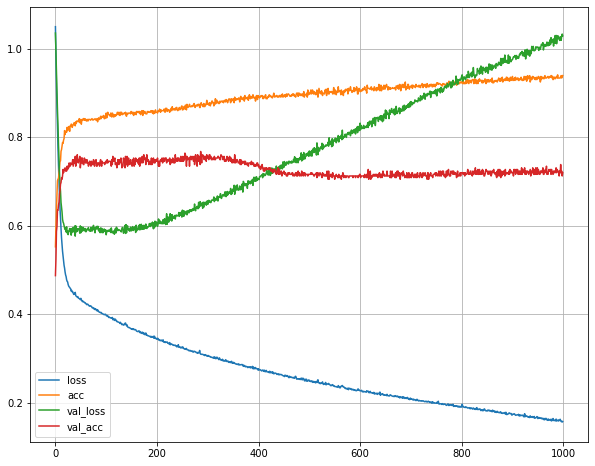

In [22]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [23]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 1.0287892818450928
Validation accuracy: 0.7195571660995483


## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

In [25]:
# Features to use
features = ["F1","F2","F3","F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

### Less nodes in hidden Layer

#### 64

In [26]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                320       
                                                                 
 dense_15 (Dense)            (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 1s 20ms/step - loss: 1.0741 - accuracy: 0.4946 - val_loss: 1.0690 - val_accuracy: 0.4871
Epoch 2/1000
18/18 [==============================] - 0s 6ms/step - loss: 1.0260 - accuracy: 0.5558 - val_loss: 1.0416 - val_accuracy: 0.4834
Epoch 3/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.9882 - accuracy: 0.5719 - val_loss: 1.0195 - val_accuracy: 0.4871
Epoch 4/1000
18/18 [=====

18/18 [==============================] - 0s 5ms/step - loss: 0.4762 - accuracy: 0.8129 - val_loss: 0.5765 - val_accuracy: 0.7417
Epoch 54/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4752 - accuracy: 0.8129 - val_loss: 0.5770 - val_accuracy: 0.7380
Epoch 55/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4736 - accuracy: 0.8112 - val_loss: 0.5721 - val_accuracy: 0.7417
Epoch 56/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4734 - accuracy: 0.8094 - val_loss: 0.5745 - val_accuracy: 0.7454
Epoch 57/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4742 - accuracy: 0.8094 - val_loss: 0.5654 - val_accuracy: 0.7380
Epoch 58/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4706 - accuracy: 0.8147 - val_loss: 0.5762 - val_accuracy: 0.7380
Epoch 59/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4701 - accuracy: 0.8058 - val_loss: 0.5779 - val_accuracy: 0.7380
Epoch 60/100

18/18 [==============================] - 0s 8ms/step - loss: 0.4489 - accuracy: 0.8237 - val_loss: 0.5828 - val_accuracy: 0.7491
Epoch 111/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4493 - accuracy: 0.8219 - val_loss: 0.5793 - val_accuracy: 0.7454
Epoch 112/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4489 - accuracy: 0.8255 - val_loss: 0.5835 - val_accuracy: 0.7491
Epoch 113/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4492 - accuracy: 0.8255 - val_loss: 0.5813 - val_accuracy: 0.7454
Epoch 114/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4494 - accuracy: 0.8255 - val_loss: 0.5789 - val_accuracy: 0.7454
Epoch 115/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4517 - accuracy: 0.8237 - val_loss: 0.5699 - val_accuracy: 0.7491
Epoch 116/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4485 - accuracy: 0.8309 - val_loss: 0.5806 - val_accuracy: 0.7528
Epoch 

Epoch 167/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4388 - accuracy: 0.8291 - val_loss: 0.5770 - val_accuracy: 0.7528
Epoch 168/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4381 - accuracy: 0.8273 - val_loss: 0.5798 - val_accuracy: 0.7417
Epoch 169/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4391 - accuracy: 0.8291 - val_loss: 0.5807 - val_accuracy: 0.7417
Epoch 170/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4382 - accuracy: 0.8309 - val_loss: 0.5769 - val_accuracy: 0.7491
Epoch 171/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4381 - accuracy: 0.8255 - val_loss: 0.5791 - val_accuracy: 0.7491
Epoch 172/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4382 - accuracy: 0.8291 - val_loss: 0.5794 - val_accuracy: 0.7454
Epoch 173/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4387 - accuracy: 0.8291 - val_loss: 0.5835 - val_accuracy

18/18 [==============================] - 0s 7ms/step - loss: 0.4325 - accuracy: 0.8327 - val_loss: 0.5907 - val_accuracy: 0.7454
Epoch 224/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4314 - accuracy: 0.8327 - val_loss: 0.5734 - val_accuracy: 0.7417
Epoch 225/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4307 - accuracy: 0.8309 - val_loss: 0.5807 - val_accuracy: 0.7454
Epoch 226/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4295 - accuracy: 0.8291 - val_loss: 0.5787 - val_accuracy: 0.7417
Epoch 227/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4300 - accuracy: 0.8327 - val_loss: 0.5732 - val_accuracy: 0.7454
Epoch 228/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4296 - accuracy: 0.8327 - val_loss: 0.5767 - val_accuracy: 0.7454
Epoch 229/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4289 - accuracy: 0.8345 - val_loss: 0.5806 - val_accuracy: 0.7454
Epoch 2

Epoch 280/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4218 - accuracy: 0.8381 - val_loss: 0.5757 - val_accuracy: 0.7454
Epoch 281/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4219 - accuracy: 0.8363 - val_loss: 0.5812 - val_accuracy: 0.7454
Epoch 282/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4220 - accuracy: 0.8363 - val_loss: 0.5710 - val_accuracy: 0.7491
Epoch 283/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4207 - accuracy: 0.8381 - val_loss: 0.5766 - val_accuracy: 0.7454
Epoch 284/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.4215 - accuracy: 0.8399 - val_loss: 0.5840 - val_accuracy: 0.7491
Epoch 285/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4210 - accuracy: 0.8381 - val_loss: 0.5761 - val_accuracy: 0.7454
Epoch 286/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4210 - accuracy: 0.8345 - val_loss: 0.5771 - val_accurac

Epoch 337/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4148 - accuracy: 0.8417 - val_loss: 0.5739 - val_accuracy: 0.7491
Epoch 338/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4137 - accuracy: 0.8399 - val_loss: 0.5736 - val_accuracy: 0.7454
Epoch 339/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4134 - accuracy: 0.8363 - val_loss: 0.5822 - val_accuracy: 0.7454
Epoch 340/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4136 - accuracy: 0.8399 - val_loss: 0.5778 - val_accuracy: 0.7417
Epoch 341/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4135 - accuracy: 0.8381 - val_loss: 0.5807 - val_accuracy: 0.7454
Epoch 342/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4138 - accuracy: 0.8381 - val_loss: 0.5755 - val_accuracy: 0.7454
Epoch 343/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4131 - accuracy: 0.8381 - val_loss: 0.5781 - val_accura

Epoch 394/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4069 - accuracy: 0.8417 - val_loss: 0.5826 - val_accuracy: 0.7491
Epoch 395/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4068 - accuracy: 0.8435 - val_loss: 0.5823 - val_accuracy: 0.7454
Epoch 396/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4080 - accuracy: 0.8435 - val_loss: 0.5856 - val_accuracy: 0.7454
Epoch 397/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4071 - accuracy: 0.8417 - val_loss: 0.5675 - val_accuracy: 0.7565
Epoch 398/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4079 - accuracy: 0.8453 - val_loss: 0.5811 - val_accuracy: 0.7491
Epoch 399/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4064 - accuracy: 0.8417 - val_loss: 0.5855 - val_accuracy: 0.7454
Epoch 400/1000
18/18 [==============================] - 0s 15ms/step - loss: 0.4064 - accuracy: 0.8453 - val_loss: 0.5796 - val_accur

18/18 [==============================] - 0s 6ms/step - loss: 0.4013 - accuracy: 0.8417 - val_loss: 0.5796 - val_accuracy: 0.7528
Epoch 451/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4018 - accuracy: 0.8525 - val_loss: 0.5865 - val_accuracy: 0.7454
Epoch 452/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4006 - accuracy: 0.8507 - val_loss: 0.5834 - val_accuracy: 0.7565
Epoch 453/1000
18/18 [==============================] - 0s 17ms/step - loss: 0.4012 - accuracy: 0.8435 - val_loss: 0.5834 - val_accuracy: 0.7565
Epoch 454/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4032 - accuracy: 0.8453 - val_loss: 0.5911 - val_accuracy: 0.7454
Epoch 455/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.4009 - accuracy: 0.8453 - val_loss: 0.5777 - val_accuracy: 0.7528
Epoch 456/1000
18/18 [==============================] - 0s 14ms/step - loss: 0.4015 - accuracy: 0.8453 - val_loss: 0.5822 - val_accuracy: 0.7528
Ep

Epoch 507/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3978 - accuracy: 0.8399 - val_loss: 0.5774 - val_accuracy: 0.7565
Epoch 508/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3965 - accuracy: 0.8507 - val_loss: 0.5903 - val_accuracy: 0.7454
Epoch 509/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3961 - accuracy: 0.8471 - val_loss: 0.5845 - val_accuracy: 0.7528
Epoch 510/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3968 - accuracy: 0.8471 - val_loss: 0.5883 - val_accuracy: 0.7491
Epoch 511/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.3953 - accuracy: 0.8507 - val_loss: 0.5771 - val_accuracy: 0.7565
Epoch 512/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3958 - accuracy: 0.8507 - val_loss: 0.5809 - val_accuracy: 0.7528
Epoch 513/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3956 - accuracy: 0.8471 - val_loss: 0.5949 - val_accurac

Epoch 564/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3909 - accuracy: 0.8507 - val_loss: 0.5849 - val_accuracy: 0.7528
Epoch 565/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3913 - accuracy: 0.8525 - val_loss: 0.5890 - val_accuracy: 0.7491
Epoch 566/1000
18/18 [==============================] - 0s 14ms/step - loss: 0.3910 - accuracy: 0.8507 - val_loss: 0.5872 - val_accuracy: 0.7491
Epoch 567/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.3919 - accuracy: 0.8489 - val_loss: 0.5871 - val_accuracy: 0.7491
Epoch 568/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3906 - accuracy: 0.8507 - val_loss: 0.5974 - val_accuracy: 0.7417
Epoch 569/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3912 - accuracy: 0.8489 - val_loss: 0.5884 - val_accuracy: 0.7491
Epoch 570/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3919 - accuracy: 0.8525 - val_loss: 0.5888 - val_accur

Epoch 621/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3891 - accuracy: 0.8489 - val_loss: 0.5951 - val_accuracy: 0.7454
Epoch 622/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3881 - accuracy: 0.8489 - val_loss: 0.5906 - val_accuracy: 0.7417
Epoch 623/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3877 - accuracy: 0.8525 - val_loss: 0.5881 - val_accuracy: 0.7528
Epoch 624/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3875 - accuracy: 0.8507 - val_loss: 0.5967 - val_accuracy: 0.7491
Epoch 625/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3874 - accuracy: 0.8507 - val_loss: 0.5882 - val_accuracy: 0.7528
Epoch 626/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3883 - accuracy: 0.8525 - val_loss: 0.5943 - val_accuracy: 0.7454
Epoch 627/1000
18/18 [==============================] - 0s 14ms/step - loss: 0.3883 - accuracy: 0.8489 - val_loss: 0.5892 - val_accurac

Epoch 678/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3852 - accuracy: 0.8507 - val_loss: 0.5946 - val_accuracy: 0.7454
Epoch 679/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3840 - accuracy: 0.8507 - val_loss: 0.6002 - val_accuracy: 0.7528
Epoch 680/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3853 - accuracy: 0.8507 - val_loss: 0.5925 - val_accuracy: 0.7491
Epoch 681/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3845 - accuracy: 0.8525 - val_loss: 0.6005 - val_accuracy: 0.7528
Epoch 682/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3837 - accuracy: 0.8507 - val_loss: 0.5902 - val_accuracy: 0.7565
Epoch 683/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3844 - accuracy: 0.8525 - val_loss: 0.5960 - val_accuracy: 0.7528
Epoch 684/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3841 - accuracy: 0.8525 - val_loss: 0.5930 - val_accurac

Epoch 735/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3820 - accuracy: 0.8507 - val_loss: 0.5982 - val_accuracy: 0.7601
Epoch 736/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3814 - accuracy: 0.8525 - val_loss: 0.5935 - val_accuracy: 0.7601
Epoch 737/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3818 - accuracy: 0.8507 - val_loss: 0.5971 - val_accuracy: 0.7528
Epoch 738/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3819 - accuracy: 0.8489 - val_loss: 0.5985 - val_accuracy: 0.7601
Epoch 739/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3817 - accuracy: 0.8453 - val_loss: 0.5975 - val_accuracy: 0.7565
Epoch 740/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3810 - accuracy: 0.8525 - val_loss: 0.5984 - val_accuracy: 0.7565
Epoch 741/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3815 - accuracy: 0.8525 - val_loss: 0.5935 - val_accuracy:

Epoch 792/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.3786 - accuracy: 0.8507 - val_loss: 0.5960 - val_accuracy: 0.7601
Epoch 793/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3786 - accuracy: 0.8543 - val_loss: 0.5981 - val_accuracy: 0.7565
Epoch 794/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.3792 - accuracy: 0.8489 - val_loss: 0.6039 - val_accuracy: 0.7565
Epoch 795/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.3805 - accuracy: 0.8507 - val_loss: 0.6103 - val_accuracy: 0.7528
Epoch 796/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.3797 - accuracy: 0.8507 - val_loss: 0.5981 - val_accuracy: 0.7491
Epoch 797/1000
18/18 [==============================] - 0s 14ms/step - loss: 0.3794 - accuracy: 0.8507 - val_loss: 0.6017 - val_accuracy: 0.7565
Epoch 798/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3790 - accuracy: 0.8489 - val_loss: 0.5976 - val_accu

Epoch 849/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3759 - accuracy: 0.8507 - val_loss: 0.6014 - val_accuracy: 0.7491
Epoch 850/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3758 - accuracy: 0.8507 - val_loss: 0.6012 - val_accuracy: 0.7601
Epoch 851/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3767 - accuracy: 0.8507 - val_loss: 0.6005 - val_accuracy: 0.7601
Epoch 852/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.3761 - accuracy: 0.8525 - val_loss: 0.6066 - val_accuracy: 0.7601
Epoch 853/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3779 - accuracy: 0.8453 - val_loss: 0.6072 - val_accuracy: 0.7638
Epoch 854/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.3769 - accuracy: 0.8453 - val_loss: 0.5986 - val_accuracy: 0.7638
Epoch 855/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3770 - accuracy: 0.8525 - val_loss: 0.6051 - val_accurac

Epoch 906/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3748 - accuracy: 0.8543 - val_loss: 0.6019 - val_accuracy: 0.7601
Epoch 907/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.3738 - accuracy: 0.8525 - val_loss: 0.6091 - val_accuracy: 0.7601
Epoch 908/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3736 - accuracy: 0.8489 - val_loss: 0.6095 - val_accuracy: 0.7638
Epoch 909/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3746 - accuracy: 0.8489 - val_loss: 0.6025 - val_accuracy: 0.7601
Epoch 910/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.3733 - accuracy: 0.8525 - val_loss: 0.6060 - val_accuracy: 0.7528
Epoch 911/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.3738 - accuracy: 0.8525 - val_loss: 0.6082 - val_accuracy: 0.7638
Epoch 912/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3733 - accuracy: 0.8543 - val_loss: 0.5969 - val_accura

Epoch 963/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3719 - accuracy: 0.8507 - val_loss: 0.6076 - val_accuracy: 0.7565
Epoch 964/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3717 - accuracy: 0.8489 - val_loss: 0.6032 - val_accuracy: 0.7491
Epoch 965/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3718 - accuracy: 0.8543 - val_loss: 0.6118 - val_accuracy: 0.7528
Epoch 966/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3720 - accuracy: 0.8525 - val_loss: 0.6094 - val_accuracy: 0.7601
Epoch 967/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3722 - accuracy: 0.8507 - val_loss: 0.6009 - val_accuracy: 0.7528
Epoch 968/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3724 - accuracy: 0.8543 - val_loss: 0.6100 - val_accuracy: 0.7528
Epoch 969/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3711 - accuracy: 0.8525 - val_loss: 0.6168 - val_accuracy:

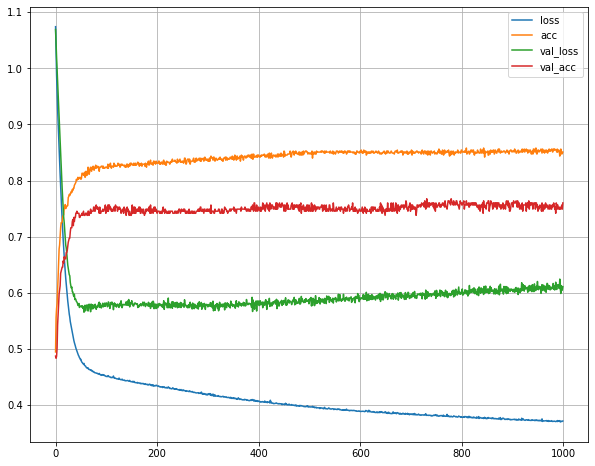

In [27]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [28]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6109436750411987
Validation accuracy: 0.7601476311683655


#### 32

In [30]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(32, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                160       
                                                                 
 dense_17 (Dense)            (None, 3)                 99        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 1s 16ms/step - loss: 1.0736 - accuracy: 0.5054 - val_loss: 1.0695 - val_accuracy: 0.5277
Epoch 2/1000
18/18 [==============================] - 0s 7ms/step - loss: 1.0393 - accuracy: 0.6493 - val_loss: 1.0496 - val_accuracy: 0.5166
Epoch 3/1000
18/18 [==============================] - 0s 10ms/step - loss: 1.0122 - accuracy: 0.6169 - val_loss: 1.0322 - val_accuracy: 0.5018
Epoch 4/1000
18/18 [====

18/18 [==============================] - 0s 17ms/step - loss: 0.5090 - accuracy: 0.7986 - val_loss: 0.5917 - val_accuracy: 0.7343
Epoch 54/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.5069 - accuracy: 0.7986 - val_loss: 0.5923 - val_accuracy: 0.7343
Epoch 55/1000
18/18 [==============================] - 0s 15ms/step - loss: 0.5052 - accuracy: 0.7986 - val_loss: 0.5931 - val_accuracy: 0.7417
Epoch 56/1000
18/18 [==============================] - 0s 14ms/step - loss: 0.5023 - accuracy: 0.8040 - val_loss: 0.5880 - val_accuracy: 0.7380
Epoch 57/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.5011 - accuracy: 0.7968 - val_loss: 0.5849 - val_accuracy: 0.7343
Epoch 58/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4997 - accuracy: 0.8040 - val_loss: 0.5845 - val_accuracy: 0.7306
Epoch 59/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4971 - accuracy: 0.7986 - val_loss: 0.5799 - val_accuracy: 0.7417
Epoch 60/1

18/18 [==============================] - 0s 11ms/step - loss: 0.4617 - accuracy: 0.8183 - val_loss: 0.5784 - val_accuracy: 0.7565
Epoch 111/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4616 - accuracy: 0.8183 - val_loss: 0.5752 - val_accuracy: 0.7565
Epoch 112/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4612 - accuracy: 0.8183 - val_loss: 0.5769 - val_accuracy: 0.7565
Epoch 113/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4610 - accuracy: 0.8183 - val_loss: 0.5836 - val_accuracy: 0.7528
Epoch 114/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4605 - accuracy: 0.8237 - val_loss: 0.5784 - val_accuracy: 0.7565
Epoch 115/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4608 - accuracy: 0.8183 - val_loss: 0.5770 - val_accuracy: 0.7565
Epoch 116/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4601 - accuracy: 0.8219 - val_loss: 0.5775 - val_accuracy: 0.7565
Epoc

Epoch 167/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4539 - accuracy: 0.8255 - val_loss: 0.5860 - val_accuracy: 0.7528
Epoch 168/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4562 - accuracy: 0.8255 - val_loss: 0.5719 - val_accuracy: 0.7528
Epoch 169/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4526 - accuracy: 0.8237 - val_loss: 0.5827 - val_accuracy: 0.7565
Epoch 170/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4523 - accuracy: 0.8237 - val_loss: 0.5837 - val_accuracy: 0.7565
Epoch 171/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4519 - accuracy: 0.8219 - val_loss: 0.5778 - val_accuracy: 0.7565
Epoch 172/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4527 - accuracy: 0.8273 - val_loss: 0.5821 - val_accuracy: 0.7565
Epoch 173/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4516 - accuracy: 0.8291 - val_loss: 0.5825 - val_accura

Epoch 224/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4464 - accuracy: 0.8291 - val_loss: 0.5827 - val_accuracy: 0.7528
Epoch 225/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4468 - accuracy: 0.8273 - val_loss: 0.5764 - val_accuracy: 0.7565
Epoch 226/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4466 - accuracy: 0.8291 - val_loss: 0.5754 - val_accuracy: 0.7528
Epoch 227/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4456 - accuracy: 0.8309 - val_loss: 0.5812 - val_accuracy: 0.7528
Epoch 228/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4454 - accuracy: 0.8291 - val_loss: 0.5865 - val_accuracy: 0.7528
Epoch 229/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4453 - accuracy: 0.8309 - val_loss: 0.5838 - val_accuracy: 0.7528
Epoch 230/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4462 - accuracy: 0.8291 - val_loss: 0.5786 - val_accuracy:

Epoch 281/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4424 - accuracy: 0.8327 - val_loss: 0.5798 - val_accuracy: 0.7491
Epoch 282/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4413 - accuracy: 0.8327 - val_loss: 0.5852 - val_accuracy: 0.7454
Epoch 283/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4412 - accuracy: 0.8327 - val_loss: 0.5894 - val_accuracy: 0.7491
Epoch 284/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4408 - accuracy: 0.8327 - val_loss: 0.5845 - val_accuracy: 0.7528
Epoch 285/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4418 - accuracy: 0.8309 - val_loss: 0.5796 - val_accuracy: 0.7491
Epoch 286/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4406 - accuracy: 0.8309 - val_loss: 0.5813 - val_accuracy: 0.7528
Epoch 287/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4405 - accuracy: 0.8309 - val_loss: 0.5809 - val_accuracy

Epoch 338/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4373 - accuracy: 0.8309 - val_loss: 0.5798 - val_accuracy: 0.7491
Epoch 339/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4370 - accuracy: 0.8309 - val_loss: 0.5837 - val_accuracy: 0.7454
Epoch 340/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4364 - accuracy: 0.8309 - val_loss: 0.5803 - val_accuracy: 0.7491
Epoch 341/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4367 - accuracy: 0.8327 - val_loss: 0.5777 - val_accuracy: 0.7491
Epoch 342/1000
18/18 [==============================] - 0s 14ms/step - loss: 0.4365 - accuracy: 0.8309 - val_loss: 0.5800 - val_accuracy: 0.7454
Epoch 343/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4368 - accuracy: 0.8345 - val_loss: 0.5780 - val_accuracy: 0.7491
Epoch 344/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.4374 - accuracy: 0.8327 - val_loss: 0.5762 - val_accur

Epoch 395/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4331 - accuracy: 0.8345 - val_loss: 0.5755 - val_accuracy: 0.7417
Epoch 396/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4326 - accuracy: 0.8309 - val_loss: 0.5802 - val_accuracy: 0.7491
Epoch 397/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4324 - accuracy: 0.8345 - val_loss: 0.5821 - val_accuracy: 0.7491
Epoch 398/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4326 - accuracy: 0.8345 - val_loss: 0.5817 - val_accuracy: 0.7491
Epoch 399/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4326 - accuracy: 0.8327 - val_loss: 0.5826 - val_accuracy: 0.7417
Epoch 400/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4324 - accuracy: 0.8345 - val_loss: 0.5797 - val_accuracy: 0.7491
Epoch 401/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4332 - accuracy: 0.8327 - val_loss: 0.5853 - val_accurac

Epoch 452/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4286 - accuracy: 0.8327 - val_loss: 0.5801 - val_accuracy: 0.7491
Epoch 453/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4292 - accuracy: 0.8345 - val_loss: 0.5813 - val_accuracy: 0.7454
Epoch 454/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4282 - accuracy: 0.8327 - val_loss: 0.5785 - val_accuracy: 0.7491
Epoch 455/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4287 - accuracy: 0.8381 - val_loss: 0.5804 - val_accuracy: 0.7454
Epoch 456/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4280 - accuracy: 0.8327 - val_loss: 0.5806 - val_accuracy: 0.7491
Epoch 457/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4291 - accuracy: 0.8309 - val_loss: 0.5813 - val_accuracy: 0.7454
Epoch 458/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4281 - accuracy: 0.8327 - val_loss: 0.5806 - val_accuracy:

Epoch 509/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4256 - accuracy: 0.8381 - val_loss: 0.5796 - val_accuracy: 0.7417
Epoch 510/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4247 - accuracy: 0.8363 - val_loss: 0.5859 - val_accuracy: 0.7491
Epoch 511/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4251 - accuracy: 0.8345 - val_loss: 0.5827 - val_accuracy: 0.7491
Epoch 512/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.4254 - accuracy: 0.8381 - val_loss: 0.5836 - val_accuracy: 0.7454
Epoch 513/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4249 - accuracy: 0.8345 - val_loss: 0.5743 - val_accuracy: 0.7380
Epoch 514/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4245 - accuracy: 0.8363 - val_loss: 0.5781 - val_accuracy: 0.7454
Epoch 515/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4245 - accuracy: 0.8345 - val_loss: 0.5822 - val_accura

Epoch 566/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4202 - accuracy: 0.8381 - val_loss: 0.5810 - val_accuracy: 0.7454
Epoch 567/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4207 - accuracy: 0.8381 - val_loss: 0.5872 - val_accuracy: 0.7454
Epoch 568/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4204 - accuracy: 0.8399 - val_loss: 0.5770 - val_accuracy: 0.7454
Epoch 569/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4210 - accuracy: 0.8399 - val_loss: 0.5787 - val_accuracy: 0.7454
Epoch 570/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4203 - accuracy: 0.8417 - val_loss: 0.5788 - val_accuracy: 0.7454
Epoch 571/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4206 - accuracy: 0.8381 - val_loss: 0.5771 - val_accuracy: 0.7491
Epoch 572/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4200 - accuracy: 0.8381 - val_loss: 0.5819 - val_accur

Epoch 623/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4177 - accuracy: 0.8399 - val_loss: 0.5813 - val_accuracy: 0.7491
Epoch 624/1000
18/18 [==============================] - 0s 24ms/step - loss: 0.4191 - accuracy: 0.8399 - val_loss: 0.5808 - val_accuracy: 0.7491
Epoch 625/1000
18/18 [==============================] - 0s 17ms/step - loss: 0.4172 - accuracy: 0.8399 - val_loss: 0.5805 - val_accuracy: 0.7454
Epoch 626/1000
18/18 [==============================] - 0s 14ms/step - loss: 0.4172 - accuracy: 0.8417 - val_loss: 0.5866 - val_accuracy: 0.7454
Epoch 627/1000
18/18 [==============================] - 0s 19ms/step - loss: 0.4168 - accuracy: 0.8417 - val_loss: 0.5821 - val_accuracy: 0.7491
Epoch 628/1000
18/18 [==============================] - 0s 20ms/step - loss: 0.4164 - accuracy: 0.8399 - val_loss: 0.5805 - val_accuracy: 0.7454
Epoch 629/1000
18/18 [==============================] - 0s 22ms/step - loss: 0.4162 - accuracy: 0.8417 - val_loss: 0.5839 - val_acc

18/18 [==============================] - 0s 17ms/step - loss: 0.4146 - accuracy: 0.8417 - val_loss: 0.5884 - val_accuracy: 0.7454
Epoch 680/1000
18/18 [==============================] - 0s 14ms/step - loss: 0.4144 - accuracy: 0.8417 - val_loss: 0.5789 - val_accuracy: 0.7491
Epoch 681/1000
18/18 [==============================] - 0s 17ms/step - loss: 0.4147 - accuracy: 0.8435 - val_loss: 0.5854 - val_accuracy: 0.7491
Epoch 682/1000
18/18 [==============================] - 0s 14ms/step - loss: 0.4149 - accuracy: 0.8435 - val_loss: 0.5793 - val_accuracy: 0.7528
Epoch 683/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4150 - accuracy: 0.8453 - val_loss: 0.5827 - val_accuracy: 0.7528
Epoch 684/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4136 - accuracy: 0.8435 - val_loss: 0.5826 - val_accuracy: 0.7454
Epoch 685/1000
18/18 [==============================] - 0s 16ms/step - loss: 0.4137 - accuracy: 0.8435 - val_loss: 0.5808 - val_accuracy: 0.7454
E

Epoch 736/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4123 - accuracy: 0.8471 - val_loss: 0.5892 - val_accuracy: 0.7491
Epoch 737/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4130 - accuracy: 0.8417 - val_loss: 0.5832 - val_accuracy: 0.7528
Epoch 738/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4122 - accuracy: 0.8435 - val_loss: 0.5812 - val_accuracy: 0.7528
Epoch 739/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4121 - accuracy: 0.8435 - val_loss: 0.5741 - val_accuracy: 0.7528
Epoch 740/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4113 - accuracy: 0.8453 - val_loss: 0.5816 - val_accuracy: 0.7528
Epoch 741/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4112 - accuracy: 0.8435 - val_loss: 0.5840 - val_accuracy: 0.7528
Epoch 742/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4109 - accuracy: 0.8471 - val_loss: 0.5855 - val_accuracy

Epoch 793/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4086 - accuracy: 0.8435 - val_loss: 0.5836 - val_accuracy: 0.7528
Epoch 794/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4088 - accuracy: 0.8471 - val_loss: 0.5839 - val_accuracy: 0.7528
Epoch 795/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4084 - accuracy: 0.8453 - val_loss: 0.5864 - val_accuracy: 0.7528
Epoch 796/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4088 - accuracy: 0.8507 - val_loss: 0.5879 - val_accuracy: 0.7491
Epoch 797/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4098 - accuracy: 0.8435 - val_loss: 0.5850 - val_accuracy: 0.7491
Epoch 798/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4085 - accuracy: 0.8471 - val_loss: 0.5875 - val_accuracy: 0.7491
Epoch 799/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4094 - accuracy: 0.8471 - val_loss: 0.5851 - val_accuracy

Epoch 850/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4061 - accuracy: 0.8453 - val_loss: 0.5853 - val_accuracy: 0.7491
Epoch 851/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.4062 - accuracy: 0.8471 - val_loss: 0.5874 - val_accuracy: 0.7491
Epoch 852/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4059 - accuracy: 0.8489 - val_loss: 0.5914 - val_accuracy: 0.7491
Epoch 853/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4064 - accuracy: 0.8489 - val_loss: 0.5895 - val_accuracy: 0.7491
Epoch 854/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4062 - accuracy: 0.8471 - val_loss: 0.5892 - val_accuracy: 0.7491
Epoch 855/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4058 - accuracy: 0.8471 - val_loss: 0.5849 - val_accuracy: 0.7454
Epoch 856/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4061 - accuracy: 0.8453 - val_loss: 0.5867 - val_accuracy

Epoch 907/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.4037 - accuracy: 0.8507 - val_loss: 0.5889 - val_accuracy: 0.7565
Epoch 908/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4039 - accuracy: 0.8489 - val_loss: 0.5893 - val_accuracy: 0.7528
Epoch 909/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.4030 - accuracy: 0.8471 - val_loss: 0.5946 - val_accuracy: 0.7528
Epoch 910/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4030 - accuracy: 0.8507 - val_loss: 0.5961 - val_accuracy: 0.7491
Epoch 911/1000
18/18 [==============================] - 0s 20ms/step - loss: 0.4032 - accuracy: 0.8507 - val_loss: 0.5906 - val_accuracy: 0.7491
Epoch 912/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4032 - accuracy: 0.8471 - val_loss: 0.5942 - val_accuracy: 0.7491
Epoch 913/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4031 - accuracy: 0.8489 - val_loss: 0.5887 - val_accu

18/18 [==============================] - 0s 14ms/step - loss: 0.4008 - accuracy: 0.8507 - val_loss: 0.5994 - val_accuracy: 0.7454
Epoch 964/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4009 - accuracy: 0.8489 - val_loss: 0.5967 - val_accuracy: 0.7491
Epoch 965/1000
18/18 [==============================] - 0s 18ms/step - loss: 0.4010 - accuracy: 0.8489 - val_loss: 0.5964 - val_accuracy: 0.7491
Epoch 966/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4002 - accuracy: 0.8525 - val_loss: 0.5969 - val_accuracy: 0.7528
Epoch 967/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4012 - accuracy: 0.8525 - val_loss: 0.5939 - val_accuracy: 0.7491
Epoch 968/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4012 - accuracy: 0.8543 - val_loss: 0.5927 - val_accuracy: 0.7528
Epoch 969/1000
18/18 [==============================] - 0s 10ms/step - loss: 0.4017 - accuracy: 0.8471 - val_loss: 0.5864 - val_accuracy: 0.7601
E

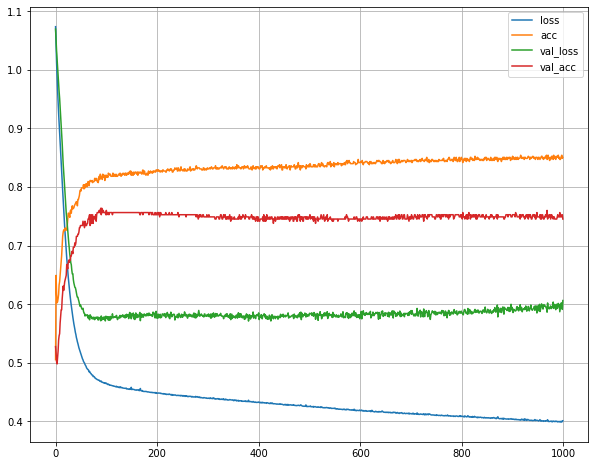

In [32]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [33]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.606334924697876
Validation accuracy: 0.7453874349594116


### Dropout Layer

In [39]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 256)               1280      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 3)                 771       
                                                                 
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 1s 22ms/step - loss: 1.0735 - accuracy: 0.4748 - val_loss: 1.0519 - val_accuracy: 0.4391
Epoch 2/1000
18/18 [==============================] - 0s 14ms/step - loss: 1.0071 - accuracy: 0.5719 - val_loss: 1.0115 - val_accuracy: 0.4908
Epoch 3/1000
18/18 [=========

18/18 [==============================] - 0s 6ms/step - loss: 0.4610 - accuracy: 0.8237 - val_loss: 0.5687 - val_accuracy: 0.7454
Epoch 53/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4632 - accuracy: 0.8381 - val_loss: 0.5713 - val_accuracy: 0.7454
Epoch 54/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.4685 - accuracy: 0.8183 - val_loss: 0.5768 - val_accuracy: 0.7417
Epoch 55/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4794 - accuracy: 0.8112 - val_loss: 0.5737 - val_accuracy: 0.7417
Epoch 56/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4665 - accuracy: 0.8219 - val_loss: 0.5772 - val_accuracy: 0.7380
Epoch 57/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4715 - accuracy: 0.8076 - val_loss: 0.5749 - val_accuracy: 0.7454
Epoch 58/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4701 - accuracy: 0.8112 - val_loss: 0.5751 - val_accuracy: 0.7454
Epoch 59/10

18/18 [==============================] - 0s 6ms/step - loss: 0.4572 - accuracy: 0.8219 - val_loss: 0.5747 - val_accuracy: 0.7454
Epoch 110/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4531 - accuracy: 0.8309 - val_loss: 0.5778 - val_accuracy: 0.7454
Epoch 111/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4539 - accuracy: 0.8273 - val_loss: 0.5784 - val_accuracy: 0.7491
Epoch 112/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4339 - accuracy: 0.8363 - val_loss: 0.5836 - val_accuracy: 0.7417
Epoch 113/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4575 - accuracy: 0.8273 - val_loss: 0.5784 - val_accuracy: 0.7491
Epoch 114/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4468 - accuracy: 0.8273 - val_loss: 0.5824 - val_accuracy: 0.7491
Epoch 115/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4414 - accuracy: 0.8183 - val_loss: 0.5756 - val_accuracy: 0.7491
Epoch 1

Epoch 166/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4251 - accuracy: 0.8435 - val_loss: 0.5802 - val_accuracy: 0.7491
Epoch 167/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4427 - accuracy: 0.8165 - val_loss: 0.5891 - val_accuracy: 0.7491
Epoch 168/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4316 - accuracy: 0.8291 - val_loss: 0.5816 - val_accuracy: 0.7528
Epoch 169/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4257 - accuracy: 0.8399 - val_loss: 0.5900 - val_accuracy: 0.7528
Epoch 170/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4235 - accuracy: 0.8345 - val_loss: 0.5909 - val_accuracy: 0.7491
Epoch 171/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4390 - accuracy: 0.8309 - val_loss: 0.5915 - val_accuracy: 0.7491
Epoch 172/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4265 - accuracy: 0.8417 - val_loss: 0.5818 - val_accuracy:

Epoch 223/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4277 - accuracy: 0.8183 - val_loss: 0.5878 - val_accuracy: 0.7491
Epoch 224/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4271 - accuracy: 0.8345 - val_loss: 0.5888 - val_accuracy: 0.7491
Epoch 225/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4327 - accuracy: 0.8237 - val_loss: 0.5946 - val_accuracy: 0.7454
Epoch 226/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4138 - accuracy: 0.8381 - val_loss: 0.5882 - val_accuracy: 0.7454
Epoch 227/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4142 - accuracy: 0.8417 - val_loss: 0.5940 - val_accuracy: 0.7491
Epoch 228/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4337 - accuracy: 0.8327 - val_loss: 0.5799 - val_accuracy: 0.7454
Epoch 229/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4148 - accuracy: 0.8273 - val_loss: 0.5957 - val_accuracy:

Epoch 280/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4281 - accuracy: 0.8363 - val_loss: 0.5917 - val_accuracy: 0.7454
Epoch 281/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4066 - accuracy: 0.8399 - val_loss: 0.5997 - val_accuracy: 0.7417
Epoch 282/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3964 - accuracy: 0.8453 - val_loss: 0.5937 - val_accuracy: 0.7491
Epoch 283/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4200 - accuracy: 0.8435 - val_loss: 0.6019 - val_accuracy: 0.7491
Epoch 284/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4221 - accuracy: 0.8273 - val_loss: 0.6033 - val_accuracy: 0.7454
Epoch 285/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4206 - accuracy: 0.8399 - val_loss: 0.6023 - val_accuracy: 0.7454
Epoch 286/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4063 - accuracy: 0.8489 - val_loss: 0.6061 - val_accuracy:

Epoch 337/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4186 - accuracy: 0.8201 - val_loss: 0.6060 - val_accuracy: 0.7454
Epoch 338/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4253 - accuracy: 0.8219 - val_loss: 0.6024 - val_accuracy: 0.7528
Epoch 339/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4182 - accuracy: 0.8291 - val_loss: 0.6034 - val_accuracy: 0.7454
Epoch 340/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4213 - accuracy: 0.8381 - val_loss: 0.6130 - val_accuracy: 0.7417
Epoch 341/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4205 - accuracy: 0.8291 - val_loss: 0.6066 - val_accuracy: 0.7454
Epoch 342/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4111 - accuracy: 0.8471 - val_loss: 0.6088 - val_accuracy: 0.7454
Epoch 343/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4038 - accuracy: 0.8543 - val_loss: 0.6040 - val_accuracy:

Epoch 394/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3964 - accuracy: 0.8291 - val_loss: 0.6192 - val_accuracy: 0.7454
Epoch 395/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 0.8435 - val_loss: 0.6205 - val_accuracy: 0.7454
Epoch 396/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4038 - accuracy: 0.8291 - val_loss: 0.6133 - val_accuracy: 0.7454
Epoch 397/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4012 - accuracy: 0.8381 - val_loss: 0.6135 - val_accuracy: 0.7491
Epoch 398/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.4042 - accuracy: 0.8417 - val_loss: 0.6128 - val_accuracy: 0.7491
Epoch 399/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4091 - accuracy: 0.8309 - val_loss: 0.6195 - val_accuracy: 0.7417
Epoch 400/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4092 - accuracy: 0.8363 - val_loss: 0.6116 - val_accuracy:

Epoch 451/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3821 - accuracy: 0.8525 - val_loss: 0.6290 - val_accuracy: 0.7454
Epoch 452/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4170 - accuracy: 0.8291 - val_loss: 0.6234 - val_accuracy: 0.7491
Epoch 453/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3985 - accuracy: 0.8471 - val_loss: 0.6197 - val_accuracy: 0.7528
Epoch 454/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3883 - accuracy: 0.8453 - val_loss: 0.6160 - val_accuracy: 0.7491
Epoch 455/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3939 - accuracy: 0.8525 - val_loss: 0.6205 - val_accuracy: 0.7454
Epoch 456/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4037 - accuracy: 0.8327 - val_loss: 0.6238 - val_accuracy: 0.7343
Epoch 457/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.4044 - accuracy: 0.8327 - val_loss: 0.6203 - val_accuracy:

Epoch 508/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4023 - accuracy: 0.8381 - val_loss: 0.6457 - val_accuracy: 0.7269
Epoch 509/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4143 - accuracy: 0.8453 - val_loss: 0.6428 - val_accuracy: 0.7343
Epoch 510/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3959 - accuracy: 0.8417 - val_loss: 0.6315 - val_accuracy: 0.7380
Epoch 511/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3816 - accuracy: 0.8525 - val_loss: 0.6293 - val_accuracy: 0.7380
Epoch 512/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4045 - accuracy: 0.8237 - val_loss: 0.6302 - val_accuracy: 0.7417
Epoch 513/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.4030 - accuracy: 0.8471 - val_loss: 0.6364 - val_accuracy: 0.7380
Epoch 514/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.4019 - accuracy: 0.8417 - val_loss: 0.6379 - val_accuracy:

Epoch 565/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3872 - accuracy: 0.8417 - val_loss: 0.6375 - val_accuracy: 0.7454
Epoch 566/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3894 - accuracy: 0.8471 - val_loss: 0.6337 - val_accuracy: 0.7491
Epoch 567/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3849 - accuracy: 0.8561 - val_loss: 0.6415 - val_accuracy: 0.7417
Epoch 568/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3817 - accuracy: 0.8381 - val_loss: 0.6427 - val_accuracy: 0.7380
Epoch 569/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3933 - accuracy: 0.8525 - val_loss: 0.6403 - val_accuracy: 0.7380
Epoch 570/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3907 - accuracy: 0.8417 - val_loss: 0.6340 - val_accuracy: 0.7491
Epoch 571/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3883 - accuracy: 0.8489 - val_loss: 0.6403 - val_accuracy:

Epoch 622/1000
18/18 [==============================] - 0s 12ms/step - loss: 0.3872 - accuracy: 0.8543 - val_loss: 0.6496 - val_accuracy: 0.7454
Epoch 623/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3925 - accuracy: 0.8471 - val_loss: 0.6510 - val_accuracy: 0.7380
Epoch 624/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3895 - accuracy: 0.8291 - val_loss: 0.6418 - val_accuracy: 0.7417
Epoch 625/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3897 - accuracy: 0.8489 - val_loss: 0.6435 - val_accuracy: 0.7417
Epoch 626/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3931 - accuracy: 0.8507 - val_loss: 0.6464 - val_accuracy: 0.7417
Epoch 627/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3967 - accuracy: 0.8435 - val_loss: 0.6562 - val_accuracy: 0.7343
Epoch 628/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3964 - accuracy: 0.8507 - val_loss: 0.6535 - val_accuracy

Epoch 679/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3995 - accuracy: 0.8453 - val_loss: 0.6551 - val_accuracy: 0.7417
Epoch 680/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3941 - accuracy: 0.8363 - val_loss: 0.6565 - val_accuracy: 0.7454
Epoch 681/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.4064 - accuracy: 0.8381 - val_loss: 0.6589 - val_accuracy: 0.7417
Epoch 682/1000
18/18 [==============================] - 0s 13ms/step - loss: 0.3837 - accuracy: 0.8525 - val_loss: 0.6616 - val_accuracy: 0.7343
Epoch 683/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3950 - accuracy: 0.8579 - val_loss: 0.6605 - val_accuracy: 0.7380
Epoch 684/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3929 - accuracy: 0.8327 - val_loss: 0.6512 - val_accuracy: 0.7454
Epoch 685/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3876 - accuracy: 0.8399 - val_loss: 0.6520 - val_accuracy

Epoch 736/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3939 - accuracy: 0.8291 - val_loss: 0.6610 - val_accuracy: 0.7343
Epoch 737/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3765 - accuracy: 0.8399 - val_loss: 0.6644 - val_accuracy: 0.7417
Epoch 738/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3780 - accuracy: 0.8453 - val_loss: 0.6636 - val_accuracy: 0.7454
Epoch 739/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3924 - accuracy: 0.8309 - val_loss: 0.6639 - val_accuracy: 0.7454
Epoch 740/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3877 - accuracy: 0.8363 - val_loss: 0.6542 - val_accuracy: 0.7454
Epoch 741/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3854 - accuracy: 0.8543 - val_loss: 0.6612 - val_accuracy: 0.7454
Epoch 742/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3891 - accuracy: 0.8489 - val_loss: 0.6658 - val_accuracy:

Epoch 793/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.3866 - accuracy: 0.8363 - val_loss: 0.6661 - val_accuracy: 0.7306
Epoch 794/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3808 - accuracy: 0.8615 - val_loss: 0.6725 - val_accuracy: 0.7232
Epoch 795/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3809 - accuracy: 0.8471 - val_loss: 0.6636 - val_accuracy: 0.7417
Epoch 796/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3803 - accuracy: 0.8471 - val_loss: 0.6676 - val_accuracy: 0.7343
Epoch 797/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3879 - accuracy: 0.8435 - val_loss: 0.6693 - val_accuracy: 0.7417
Epoch 798/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3812 - accuracy: 0.8399 - val_loss: 0.6599 - val_accuracy: 0.7491
Epoch 799/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3908 - accuracy: 0.8435 - val_loss: 0.6650 - val_accuracy:

Epoch 850/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3684 - accuracy: 0.8507 - val_loss: 0.6697 - val_accuracy: 0.7380
Epoch 851/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3883 - accuracy: 0.8417 - val_loss: 0.6700 - val_accuracy: 0.7417
Epoch 852/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3891 - accuracy: 0.8399 - val_loss: 0.6758 - val_accuracy: 0.7417
Epoch 853/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3908 - accuracy: 0.8417 - val_loss: 0.6791 - val_accuracy: 0.7417
Epoch 854/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3712 - accuracy: 0.8453 - val_loss: 0.6787 - val_accuracy: 0.7454
Epoch 855/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3787 - accuracy: 0.8471 - val_loss: 0.6827 - val_accuracy: 0.7454
Epoch 856/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3795 - accuracy: 0.8507 - val_loss: 0.6829 - val_accuracy:

Epoch 907/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3719 - accuracy: 0.8399 - val_loss: 0.6763 - val_accuracy: 0.7454
Epoch 908/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3822 - accuracy: 0.8489 - val_loss: 0.6827 - val_accuracy: 0.7417
Epoch 909/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.3806 - accuracy: 0.8597 - val_loss: 0.6816 - val_accuracy: 0.7417
Epoch 910/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3835 - accuracy: 0.8471 - val_loss: 0.6864 - val_accuracy: 0.7343
Epoch 911/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3797 - accuracy: 0.8507 - val_loss: 0.6818 - val_accuracy: 0.7417
Epoch 912/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3889 - accuracy: 0.8435 - val_loss: 0.6848 - val_accuracy: 0.7380
Epoch 913/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3821 - accuracy: 0.8525 - val_loss: 0.6818 - val_accuracy:

Epoch 964/1000
18/18 [==============================] - 0s 8ms/step - loss: 0.3750 - accuracy: 0.8417 - val_loss: 0.6842 - val_accuracy: 0.7454
Epoch 965/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3995 - accuracy: 0.8345 - val_loss: 0.6885 - val_accuracy: 0.7417
Epoch 966/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3736 - accuracy: 0.8525 - val_loss: 0.6890 - val_accuracy: 0.7343
Epoch 967/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.3619 - accuracy: 0.8615 - val_loss: 0.6872 - val_accuracy: 0.7417
Epoch 968/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3717 - accuracy: 0.8489 - val_loss: 0.6989 - val_accuracy: 0.7417
Epoch 969/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3685 - accuracy: 0.8507 - val_loss: 0.6961 - val_accuracy: 0.7417
Epoch 970/1000
18/18 [==============================] - 0s 7ms/step - loss: 0.3676 - accuracy: 0.8597 - val_loss: 0.6945 - val_accuracy:

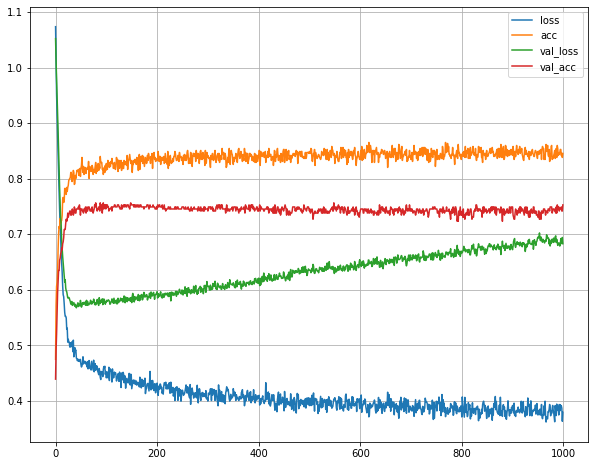

In [40]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

Using a dropout layer we can somewhat limit the overfitting. Instead of the validation loss growing to >1 as seen in problem 1, it now only grows to approx. 0.7 and the validation accuracy is close to constant.

In [41]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6829138398170471
Validation accuracy: 0.7527675032615662


## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

In [53]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
genders = ["F", "M"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [genders.index(ge) for ge in train["Gender"]]
validlabels = [genders.index(ge) for ge in valid["Gender"]]
print(train)

      SpeakerID Gender Phoneme        F1        F2        F3        F4  \
39         cjf0      F      ae  0.714021  1.999640  2.834684  4.251902   
83         daw0      F      ux  0.479160  2.019393  2.617239  4.230577   
88         daw0      F      ux  0.460181  1.939525  2.671273  4.222328   
107        daw0      F      ey  0.571166  2.015187  2.766610  4.231165   
138        daw0      F      ey  0.590581  2.074329  2.808630  4.292247   
...         ...    ...     ...       ...       ...       ...       ...   
12457      dlm0      M      ey  0.501317  1.912255  2.780398  3.809606   
12476      dlm0      M      ae  0.522834  1.846401  2.517814  3.631916   
12491      dlr0      M      ey  0.507001  1.856752  2.477168  3.441282   
12551      dlr0      M      ey  0.547231  1.703629  2.492802  3.614419   
12567      dlr0      M      ey  0.550797  1.594448  2.452342  3.698832   

             B1        B2        B3        B4  
39     0.162071  0.312755  0.331868  0.444793  
83     0.174437

### F1 F2 F3 F4

In [50]:
# Features to use
features = ["F1","F2","F3","F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(genders))
y_valid = keras.utils.to_categorical(validlabels, len(genders))

In [65]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.keras.activations.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=500, batch_size=32, verbose=True)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 256)               2304      
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 2)                 514       
                                                                 
Total params: 2,818
Trainable params: 2,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
18/18 [==============================] - 1s 17ms/step - loss: 0.6054 - accuracy: 0.8543 - val_loss: 0.5361 - val_accuracy: 0.8635
Epoch 2/500
18/18 [==============================] - 0s 12ms/step - loss: 0.4715 - accuracy: 0.8885 - val_loss: 0.4323 - val_accuracy: 0.8672
Epoch 3/500
18/18 [============

Epoch 53/500
18/18 [==============================] - 0s 9ms/step - loss: 0.1880 - accuracy: 0.9263 - val_loss: 0.3192 - val_accuracy: 0.8745
Epoch 54/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1724 - accuracy: 0.9335 - val_loss: 0.3216 - val_accuracy: 0.8745
Epoch 55/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1830 - accuracy: 0.9335 - val_loss: 0.3229 - val_accuracy: 0.8708
Epoch 56/500
18/18 [==============================] - 0s 10ms/step - loss: 0.1797 - accuracy: 0.9335 - val_loss: 0.3227 - val_accuracy: 0.8745
Epoch 57/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1822 - accuracy: 0.9245 - val_loss: 0.3233 - val_accuracy: 0.8745
Epoch 58/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1816 - accuracy: 0.9299 - val_loss: 0.3219 - val_accuracy: 0.8745
Epoch 59/500
18/18 [==============================] - 0s 9ms/step - loss: 0.1710 - accuracy: 0.9335 - val_loss: 0.3226 - val_accuracy: 0.8745
Epoch

18/18 [==============================] - 0s 6ms/step - loss: 0.1513 - accuracy: 0.9353 - val_loss: 0.3484 - val_accuracy: 0.8598
Epoch 111/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1514 - accuracy: 0.9424 - val_loss: 0.3497 - val_accuracy: 0.8598
Epoch 112/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1550 - accuracy: 0.9353 - val_loss: 0.3463 - val_accuracy: 0.8598
Epoch 113/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1490 - accuracy: 0.9442 - val_loss: 0.3503 - val_accuracy: 0.8561
Epoch 114/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1560 - accuracy: 0.9263 - val_loss: 0.3506 - val_accuracy: 0.8561
Epoch 115/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1472 - accuracy: 0.9371 - val_loss: 0.3477 - val_accuracy: 0.8598
Epoch 116/500
18/18 [==============================] - 0s 9ms/step - loss: 0.1462 - accuracy: 0.9371 - val_loss: 0.3529 - val_accuracy: 0.8561
Epoch 117/500

18/18 [==============================] - 0s 7ms/step - loss: 0.1408 - accuracy: 0.9442 - val_loss: 0.3792 - val_accuracy: 0.8524
Epoch 168/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1325 - accuracy: 0.9460 - val_loss: 0.3779 - val_accuracy: 0.8561
Epoch 169/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1336 - accuracy: 0.9406 - val_loss: 0.3806 - val_accuracy: 0.8598
Epoch 170/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1494 - accuracy: 0.9388 - val_loss: 0.3780 - val_accuracy: 0.8598
Epoch 171/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1365 - accuracy: 0.9424 - val_loss: 0.3788 - val_accuracy: 0.8598
Epoch 172/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1357 - accuracy: 0.9478 - val_loss: 0.3797 - val_accuracy: 0.8524
Epoch 173/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1382 - accuracy: 0.9388 - val_loss: 0.3804 - val_accuracy: 0.8524
Epoch 174/500

18/18 [==============================] - 0s 9ms/step - loss: 0.1250 - accuracy: 0.9514 - val_loss: 0.4010 - val_accuracy: 0.8598
Epoch 225/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1243 - accuracy: 0.9442 - val_loss: 0.4053 - val_accuracy: 0.8561
Epoch 226/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1143 - accuracy: 0.9496 - val_loss: 0.4034 - val_accuracy: 0.8524
Epoch 227/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1235 - accuracy: 0.9496 - val_loss: 0.4015 - val_accuracy: 0.8561
Epoch 228/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1275 - accuracy: 0.9442 - val_loss: 0.4020 - val_accuracy: 0.8598
Epoch 229/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1254 - accuracy: 0.9478 - val_loss: 0.4063 - val_accuracy: 0.8598
Epoch 230/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1233 - accuracy: 0.9514 - val_loss: 0.4038 - val_accuracy: 0.8561
Epoch 231/500

18/18 [==============================] - 0s 8ms/step - loss: 0.1095 - accuracy: 0.9496 - val_loss: 0.4308 - val_accuracy: 0.8524
Epoch 282/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1142 - accuracy: 0.9442 - val_loss: 0.4304 - val_accuracy: 0.8524
Epoch 283/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1278 - accuracy: 0.9388 - val_loss: 0.4331 - val_accuracy: 0.8487
Epoch 284/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1222 - accuracy: 0.9353 - val_loss: 0.4405 - val_accuracy: 0.8487
Epoch 285/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1187 - accuracy: 0.9496 - val_loss: 0.4373 - val_accuracy: 0.8524
Epoch 286/500
18/18 [==============================] - 0s 9ms/step - loss: 0.1148 - accuracy: 0.9442 - val_loss: 0.4353 - val_accuracy: 0.8487
Epoch 287/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1193 - accuracy: 0.9478 - val_loss: 0.4328 - val_accuracy: 0.8524
Epoch 288/500

18/18 [==============================] - 0s 6ms/step - loss: 0.1048 - accuracy: 0.9514 - val_loss: 0.4562 - val_accuracy: 0.8487
Epoch 339/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1259 - accuracy: 0.9388 - val_loss: 0.4599 - val_accuracy: 0.8450
Epoch 340/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1108 - accuracy: 0.9460 - val_loss: 0.4550 - val_accuracy: 0.8487
Epoch 341/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1079 - accuracy: 0.9550 - val_loss: 0.4583 - val_accuracy: 0.8487
Epoch 342/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1180 - accuracy: 0.9460 - val_loss: 0.4583 - val_accuracy: 0.8487
Epoch 343/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1089 - accuracy: 0.9514 - val_loss: 0.4605 - val_accuracy: 0.8487
Epoch 344/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1263 - accuracy: 0.9424 - val_loss: 0.4609 - val_accuracy: 0.8524
Epoch 345/500

18/18 [==============================] - 0s 8ms/step - loss: 0.0963 - accuracy: 0.9550 - val_loss: 0.4886 - val_accuracy: 0.8561
Epoch 396/500
18/18 [==============================] - 0s 9ms/step - loss: 0.1172 - accuracy: 0.9478 - val_loss: 0.4954 - val_accuracy: 0.8524
Epoch 397/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1179 - accuracy: 0.9532 - val_loss: 0.4932 - val_accuracy: 0.8450
Epoch 398/500
18/18 [==============================] - 0s 9ms/step - loss: 0.1064 - accuracy: 0.9532 - val_loss: 0.4907 - val_accuracy: 0.8524
Epoch 399/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1050 - accuracy: 0.9568 - val_loss: 0.4928 - val_accuracy: 0.8561
Epoch 400/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1026 - accuracy: 0.9460 - val_loss: 0.4892 - val_accuracy: 0.8487
Epoch 401/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1065 - accuracy: 0.9478 - val_loss: 0.4918 - val_accuracy: 0.8487
Epoch 402/500

18/18 [==============================] - 0s 8ms/step - loss: 0.1099 - accuracy: 0.9406 - val_loss: 0.5218 - val_accuracy: 0.8450
Epoch 453/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1141 - accuracy: 0.9478 - val_loss: 0.5184 - val_accuracy: 0.8450
Epoch 454/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1083 - accuracy: 0.9442 - val_loss: 0.5182 - val_accuracy: 0.8487
Epoch 455/500
18/18 [==============================] - 0s 9ms/step - loss: 0.0971 - accuracy: 0.9550 - val_loss: 0.5227 - val_accuracy: 0.8487
Epoch 456/500
18/18 [==============================] - 0s 11ms/step - loss: 0.1009 - accuracy: 0.9424 - val_loss: 0.5218 - val_accuracy: 0.8487
Epoch 457/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1134 - accuracy: 0.9496 - val_loss: 0.5212 - val_accuracy: 0.8524
Epoch 458/500
18/18 [==============================] - 0s 9ms/step - loss: 0.1097 - accuracy: 0.9550 - val_loss: 0.5180 - val_accuracy: 0.8524
Epoch 459/50

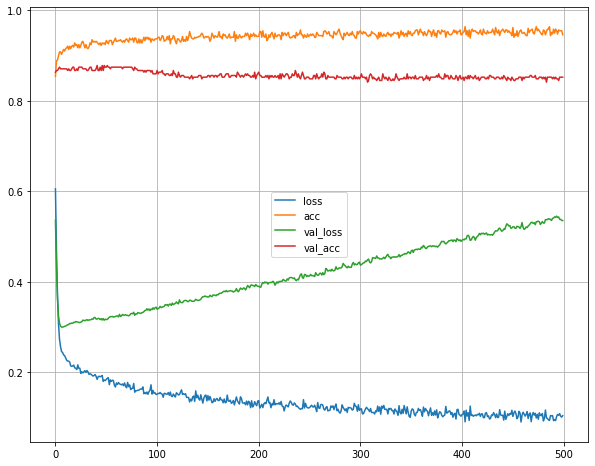

In [66]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [67]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.535382866859436
Validation accuracy: 0.8523985147476196


### F1 F2 F3 F4 B1 B2 B3 B4

In [68]:
# Features to use
features = ["F1","F2","F3","F4","B1","B2","B3","B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(genders))
y_valid = keras.utils.to_categorical(validlabels, len(genders))

In [69]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(genders), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=500, batch_size=32, verbose=True)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 256)               2304      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 2)                 514       
                                                                 
Total params: 2,818
Trainable params: 2,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
18/18 [==============================] - 1s 15ms/step - loss: 0.6167 - accuracy: 0.8219 - val_loss: 0.5484 - val_accuracy: 0.8708
Epoch 2/500
18/18 [==============================] - 0s 7ms/step - loss: 0.4801 - accuracy: 0.8975 - val_loss: 0.4409 - val_accuracy: 0.8635
Epoch 3/500
18/18 [=============

18/18 [==============================] - 0s 7ms/step - loss: 0.1742 - accuracy: 0.9281 - val_loss: 0.3148 - val_accuracy: 0.8745
Epoch 53/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1761 - accuracy: 0.9245 - val_loss: 0.3155 - val_accuracy: 0.8745
Epoch 54/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1820 - accuracy: 0.9263 - val_loss: 0.3186 - val_accuracy: 0.8745
Epoch 55/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1762 - accuracy: 0.9263 - val_loss: 0.3185 - val_accuracy: 0.8745
Epoch 56/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1756 - accuracy: 0.9299 - val_loss: 0.3168 - val_accuracy: 0.8745
Epoch 57/500
18/18 [==============================] - 0s 7ms/step - loss: 0.1750 - accuracy: 0.9299 - val_loss: 0.3168 - val_accuracy: 0.8745
Epoch 58/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1667 - accuracy: 0.9281 - val_loss: 0.3188 - val_accuracy: 0.8745
Epoch 59/500
18/18 

18/18 [==============================] - 0s 8ms/step - loss: 0.1534 - accuracy: 0.9406 - val_loss: 0.3502 - val_accuracy: 0.8561
Epoch 110/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1517 - accuracy: 0.9442 - val_loss: 0.3452 - val_accuracy: 0.8598
Epoch 111/500
18/18 [==============================] - 0s 6ms/step - loss: 0.1593 - accuracy: 0.9317 - val_loss: 0.3466 - val_accuracy: 0.8561
Epoch 112/500
18/18 [==============================] - 0s 10ms/step - loss: 0.1559 - accuracy: 0.9353 - val_loss: 0.3474 - val_accuracy: 0.8561
Epoch 113/500
18/18 [==============================] - 0s 12ms/step - loss: 0.1365 - accuracy: 0.9442 - val_loss: 0.3459 - val_accuracy: 0.8635
Epoch 114/500
18/18 [==============================] - 0s 11ms/step - loss: 0.1534 - accuracy: 0.9353 - val_loss: 0.3476 - val_accuracy: 0.8561
Epoch 115/500
18/18 [==============================] - 0s 14ms/step - loss: 0.1469 - accuracy: 0.9388 - val_loss: 0.3418 - val_accuracy: 0.8635
Epoch 116

18/18 [==============================] - 0s 11ms/step - loss: 0.1310 - accuracy: 0.9442 - val_loss: 0.3718 - val_accuracy: 0.8561
Epoch 167/500
18/18 [==============================] - 0s 9ms/step - loss: 0.1334 - accuracy: 0.9406 - val_loss: 0.3719 - val_accuracy: 0.8561
Epoch 168/500
18/18 [==============================] - 0s 9ms/step - loss: 0.1384 - accuracy: 0.9406 - val_loss: 0.3747 - val_accuracy: 0.8561
Epoch 169/500
18/18 [==============================] - 0s 10ms/step - loss: 0.1348 - accuracy: 0.9424 - val_loss: 0.3761 - val_accuracy: 0.8561
Epoch 170/500
18/18 [==============================] - 0s 9ms/step - loss: 0.1331 - accuracy: 0.9442 - val_loss: 0.3748 - val_accuracy: 0.8598
Epoch 171/500
18/18 [==============================] - 0s 9ms/step - loss: 0.1342 - accuracy: 0.9460 - val_loss: 0.3743 - val_accuracy: 0.8635
Epoch 172/500
18/18 [==============================] - 0s 8ms/step - loss: 0.1352 - accuracy: 0.9299 - val_loss: 0.3760 - val_accuracy: 0.8598
Epoch 173/5

18/18 [==============================] - 0s 4ms/step - loss: 0.1211 - accuracy: 0.9460 - val_loss: 0.3987 - val_accuracy: 0.8598
Epoch 224/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1222 - accuracy: 0.9460 - val_loss: 0.3997 - val_accuracy: 0.8635
Epoch 225/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 0.9496 - val_loss: 0.4025 - val_accuracy: 0.8598
Epoch 226/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1296 - accuracy: 0.9460 - val_loss: 0.4015 - val_accuracy: 0.8598
Epoch 227/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1300 - accuracy: 0.9442 - val_loss: 0.4011 - val_accuracy: 0.8598
Epoch 228/500
18/18 [==============================] - 0s 3ms/step - loss: 0.1176 - accuracy: 0.9568 - val_loss: 0.4028 - val_accuracy: 0.8635
Epoch 229/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1245 - accuracy: 0.9424 - val_loss: 0.4100 - val_accuracy: 0.8524
Epoch 230/500

18/18 [==============================] - 0s 5ms/step - loss: 0.1115 - accuracy: 0.9586 - val_loss: 0.4256 - val_accuracy: 0.8598
Epoch 281/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.9496 - val_loss: 0.4334 - val_accuracy: 0.8524
Epoch 282/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1161 - accuracy: 0.9478 - val_loss: 0.4290 - val_accuracy: 0.8561
Epoch 283/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1196 - accuracy: 0.9478 - val_loss: 0.4255 - val_accuracy: 0.8598
Epoch 284/500
18/18 [==============================] - 0s 3ms/step - loss: 0.1109 - accuracy: 0.9568 - val_loss: 0.4276 - val_accuracy: 0.8635
Epoch 285/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1116 - accuracy: 0.9424 - val_loss: 0.4307 - val_accuracy: 0.8635
Epoch 286/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1176 - accuracy: 0.9460 - val_loss: 0.4290 - val_accuracy: 0.8598
Epoch 287/500

18/18 [==============================] - 0s 4ms/step - loss: 0.1059 - accuracy: 0.9460 - val_loss: 0.4548 - val_accuracy: 0.8598
Epoch 338/500
18/18 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9514 - val_loss: 0.4582 - val_accuracy: 0.8524
Epoch 339/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1012 - accuracy: 0.9568 - val_loss: 0.4560 - val_accuracy: 0.8598
Epoch 340/500
18/18 [==============================] - 0s 3ms/step - loss: 0.1097 - accuracy: 0.9532 - val_loss: 0.4516 - val_accuracy: 0.8635
Epoch 341/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1095 - accuracy: 0.9496 - val_loss: 0.4526 - val_accuracy: 0.8598
Epoch 342/500
18/18 [==============================] - 0s 5ms/step - loss: 0.1064 - accuracy: 0.9496 - val_loss: 0.4517 - val_accuracy: 0.8598
Epoch 343/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1109 - accuracy: 0.9442 - val_loss: 0.4514 - val_accuracy: 0.8635
Epoch 344/500

18/18 [==============================] - 0s 4ms/step - loss: 0.0999 - accuracy: 0.9640 - val_loss: 0.4787 - val_accuracy: 0.8635
Epoch 395/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1054 - accuracy: 0.9460 - val_loss: 0.4813 - val_accuracy: 0.8598
Epoch 396/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1065 - accuracy: 0.9568 - val_loss: 0.4848 - val_accuracy: 0.8598
Epoch 397/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1089 - accuracy: 0.9550 - val_loss: 0.4812 - val_accuracy: 0.8561
Epoch 398/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1016 - accuracy: 0.9568 - val_loss: 0.4841 - val_accuracy: 0.8561
Epoch 399/500
18/18 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9496 - val_loss: 0.4871 - val_accuracy: 0.8561
Epoch 400/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1103 - accuracy: 0.9532 - val_loss: 0.4936 - val_accuracy: 0.8561
Epoch 401/500

18/18 [==============================] - 0s 4ms/step - loss: 0.1083 - accuracy: 0.9550 - val_loss: 0.5044 - val_accuracy: 0.8561
Epoch 452/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1009 - accuracy: 0.9478 - val_loss: 0.5029 - val_accuracy: 0.8598
Epoch 453/500
18/18 [==============================] - 0s 5ms/step - loss: 0.0995 - accuracy: 0.9550 - val_loss: 0.5108 - val_accuracy: 0.8487
Epoch 454/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1028 - accuracy: 0.9568 - val_loss: 0.5058 - val_accuracy: 0.8561
Epoch 455/500
18/18 [==============================] - 0s 4ms/step - loss: 0.0922 - accuracy: 0.9586 - val_loss: 0.5035 - val_accuracy: 0.8635
Epoch 456/500
18/18 [==============================] - 0s 4ms/step - loss: 0.0902 - accuracy: 0.9604 - val_loss: 0.5079 - val_accuracy: 0.8561
Epoch 457/500
18/18 [==============================] - 0s 4ms/step - loss: 0.1015 - accuracy: 0.9550 - val_loss: 0.5035 - val_accuracy: 0.8635
Epoch 458/500

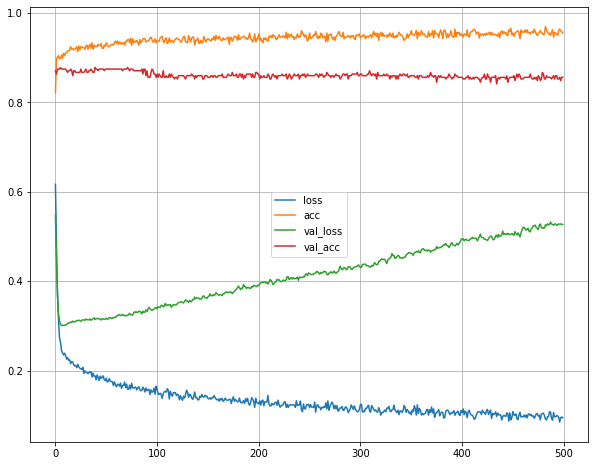

In [70]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [71]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.5265582799911499
Validation accuracy: 0.8560885787010193
